In [1]:
# initial setup
try:
    # settings colab:
    import google.colab
        
except ModuleNotFoundError:    
    # settings local:
    %run "common/0_notebooks_base_setup.py"

default checking
Running command `conda list`... ok
jupyterlab=1.2.6 already installed
pandas=1.0.3 already installed
matplotlib=2.2.2 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
psutil=5.7.0 already installed
scipy=1.4.1 already installed
statsmodels=0.11.0 already installed
scikit-learn=0.22.1 already installed
xlrd=1.2.0 already installed
plotly=4.6.0 already installed
chart-studio=1.1.0 already installed
plotly-orca=1.3.1 already installed
Running command `conda install --yes unicodedata2`... error
    
ProxyError: Conda cannot proceed due to an error in your proxy configuration.
Check for typos and other configuration errors in any '.netrc' file in your home directory,
any environment variables ending in '_PROXY', and any other system-wide proxy
configuration settings.



Importando librerías ...
Las librerías has sido importadas con éxito


In [2]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos parámetros globales para matplotlib.
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16

In [3]:
# LECTURA DEL ARCHIVO DE DATOS
data_clean = pd.read_csv("CleanCSV/Clean08_OultiersxZona.csv")

In [4]:
# SÓLO PARA USO EN COMPARACIONES
data_clean_ORIGINAL = data_clean.copy(deep=True) 

In [5]:
data_clean.head(3)

,Unnamed: 0,Unnamed: 0.1,País,Provincia,Área,Localidad,Zona,Lugar,operation,property_type,...,jardin_dummy,quincho_dummy,aire acondicionado_dummy,amenities_dummy,estrenar_dummy,gimnasio_dummy,frente_dummy,subte_dummy,baulera_dummy,Outliers
0,0,0,Argentina,Capital Federal,Capital Federal,Mataderos,Mataderos,Mataderos,sell,PH,...,False,False,False,False,False,False,False,False,False,NaN
1,1,1,Argentina,Buenos Aires,Zona Sur,La Plata,La Plata,La Plata,sell,apartment,...,False,False,False,False,True,False,True,False,False,NaN
2,2,2,Argentina,Capital Federal,Capital Federal,Mataderos,Mataderos,Mataderos,sell,apartment,...,False,False,False,False,False,False,False,False,False,NaN


In [6]:
data_clean.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'País', 'Provincia', 'Área', 'Localidad', 'Zona', 'Lugar', 'operation', 'property_type', 'geonames_id', 'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms', 'expenses', 'garage|cochera_dummy', 'lavadero_dummy', 'balcon_dummy', 'parrilla_dummy', 'piscina_dummy', 'terraza_dummy', 'patio_dummy', 'jardin_dummy', 'quincho_dummy', 'aire acondicionado_dummy', 'amenities_dummy', 'estrenar_dummy', 'gimnasio_dummy', 'frente_dummy', 'subte_dummy', 'baulera_dummy', 'Outliers'], dtype='object')

<hr id="Ubicaciones">

#### AGRUPAR DATAFRAME

Elegir alguna de las siguientes dos celdas:

In [7]:
# USAR ESTO SI QUIERO TODO CAPITAL FEDERAL y DEPARTAMENTOS
grupos_x_localidad = data_clean.loc[(data_clean["Área"] == "Capital Federal") & (data_clean["property_type"] == "apartment")]
dataf = grupos_x_localidad[["price_usd_per_m2", 'surface_total_in_m2', 'garage|cochera_dummy', 'lavadero_dummy', 'balcon_dummy', 'parrilla_dummy',
                'piscina_dummy', 'terraza_dummy', 'patio_dummy', 'jardin_dummy', 'quincho_dummy', 'aire acondicionado_dummy',
                'amenities_dummy', 'estrenar_dummy', 'gimnasio_dummy', 'frente_dummy', 'subte_dummy', 'baulera_dummy']]

In [8]:
dataf.shape

(25373, 18)

In [9]:
dataf.isnull().sum()

price_usd_per_m2            4440
surface_total_in_m2          200
garage|cochera_dummy           0
lavadero_dummy                 0
balcon_dummy                   0
parrilla_dummy                 0
piscina_dummy                  0
terraza_dummy                  0
patio_dummy                    0
jardin_dummy                   0
quincho_dummy                  0
aire acondicionado_dummy       0
amenities_dummy                0
estrenar_dummy                 0
gimnasio_dummy                 0
frente_dummy                   0
subte_dummy                    0
baulera_dummy                  0
dtype: int64

In [10]:
# sin nulos
#dataf.drop(columns=["Outliers"], inplace=True)
dataf.dropna(how="any", axis=0, inplace= True)

In [11]:
dataf.isnull().sum()

price_usd_per_m2            0
surface_total_in_m2         0
garage|cochera_dummy        0
lavadero_dummy              0
balcon_dummy                0
parrilla_dummy              0
piscina_dummy               0
terraza_dummy               0
patio_dummy                 0
jardin_dummy                0
quincho_dummy               0
aire acondicionado_dummy    0
amenities_dummy             0
estrenar_dummy              0
gimnasio_dummy              0
frente_dummy                0
subte_dummy                 0
baulera_dummy               0
dtype: int64

In [12]:
dataf.shape

(20929, 18)

In [13]:
# armado de datos
#'jardin_dummy', LO SACO PORQUE ME DIÓ COLINEALIDAD
#'quincho_dummy', LO SACO PORQUE ME DIÓ COLINEALIDAD
feature_cols = ['surface_total_in_m2', 'garage|cochera_dummy', 'lavadero_dummy', 'balcon_dummy', 'parrilla_dummy',
                'piscina_dummy', 'terraza_dummy', 'patio_dummy', 'aire acondicionado_dummy',
                'amenities_dummy', 'estrenar_dummy', 'gimnasio_dummy', 'frente_dummy', 'subte_dummy', 'baulera_dummy']
X = dataf[feature_cols].astype(int)
y = dataf.price_usd_per_m2

print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (20929, 15)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (20929,)
Type y: <class 'pandas.core.series.Series'>


In [14]:
# importamos el modelo lineal y algunas funciones para calcular la bondad de ajuste.
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
# 2_dilema_sesgo_varianza - EMI
# EMI: ahora va a hacer las validaciones cruzada para cada grado de polinomio:

In [17]:
from sklearn.model_selection import cross_val_score
cv_scores_mean = []

for i in range(X_train.shape[1]):
    cv_score = cross_val_score(model, X_train.iloc[:, :i+1], y_train, cv=3)
    cv_scores_mean.append(cv_score.mean())

cv_scores_mean  # hace medias de los scores que obtiene para cada grado de polinomio

[0.00526095709951017,
 0.046546409556301925,
 0.05158439665062701,
 0.05191614720564427,
 0.05168149269733376,
 0.0856647554940767,
 0.08572777139731018,
 0.09921238826370538,
 0.09968222755859335,
 0.11334753084557452,
 0.11316347077598699,
 0.11708729016850505,
 0.11733830144287827,
 0.12187360131535445,
 0.1233936728948996]

In [18]:
# El mejor score promedio de validación cruzada es...
max(cv_scores_mean).round(2)

0.12

In [19]:
# ... y ocurre para el grado...
cv_scores_mean.index(max(cv_scores_mean)) + 1

15

R2=   0.12235470258129989


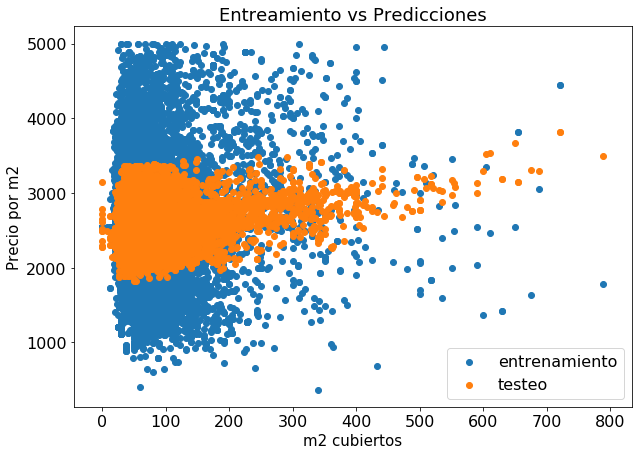

In [20]:
# Generamos un eje para graficar las curvas
# X_train, X_test, y_train, y_test
model.fit(X_train, y_train)
y_pred = model.predict(X)

plt.figure(figsize=(10,7))
plt.scatter(X.surface_total_in_m2, y)
plt.scatter(X.surface_total_in_m2, y_pred)

plt.legend(["entrenamiento", 'testeo'])
plt.title('Entreamiento vs Predicciones',fontdict=dict(fontsize=18))
plt.xlabel('m2 cubiertos', fontdict=dict(fontsize=15))
plt.ylabel(f'Precio por m2', fontdict=dict(fontsize=15));

print ('R2=', ' ', model.score(X_test, y_test))   # vemos los errors con los datos (por defecto el score es R2)

Luego de realizar múltiples pruebas siguiendo la estrategia de validación cruzada, **identificamos que el modelo que mejores resultados obtiene en promedio es aquel de grado 2**, tal como era de esperar considerando la naturaleza de los datos con los que estamos trabajando.

**Siempre que deseemos identificar cuál el el grado de complejidad o la configuración óptima de un modelo, será importante realizar diversas pruebas de *cross validation* para contar con resultados robustos que nos ayuden a seleccionar el mejor modelo.**

In [21]:
# USANDO statsmodel
# Tenemos que agregar explícitamente a una constante:
X = dataf[feature_cols].astype(int)

X = sm.add_constant(X)   # este es la forma que da la librería para decirle que me estime la ordenada al origen
y = dataf.price_usd_per_m2

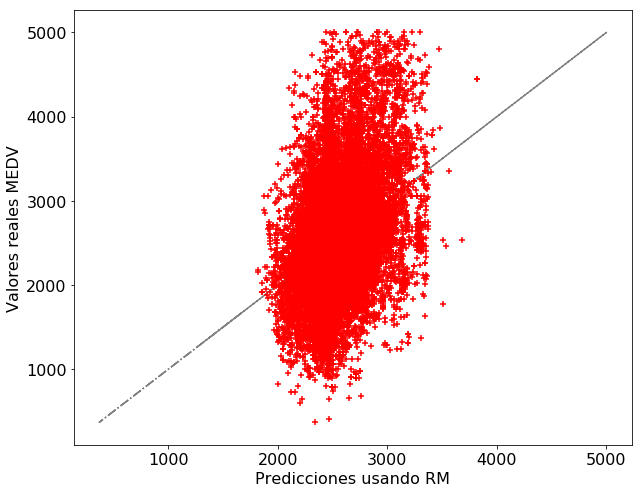

EMC: 415075.74084723776
R2:  0.12483047394547098


In [22]:
# USANDO statsmodel
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print('R2: ', model.rsquared)

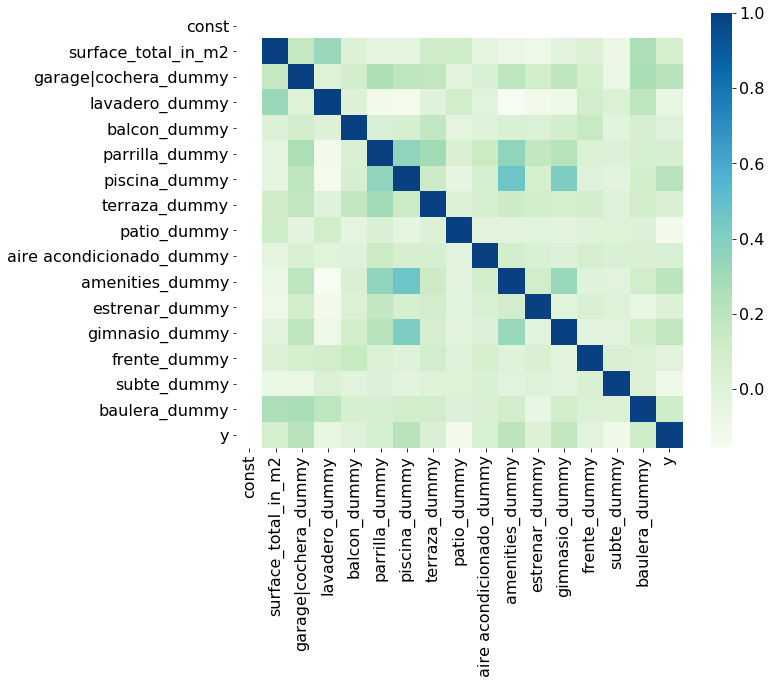

In [23]:
# hacemos esto por el Warning [2] que aparece arriba
#import seaborn as sns
df_temp = X.copy(deep= True)
df_temp["y"] = y
sns.heatmap(df_temp.corr(), cmap="GnBu", annot=False)

## Resumen
<div id="caja4" style="float:left;width: 100%;">
  <div style="float:right;width: 15%;"><img src="../../../common/icons/en_resumen.png" style="align:right"/> </div>
  <div style="float:right;width: 85%;"><label></label></div>
</div>


#### EN GENERAL POR LO QUE DIJO EL PROFESOR, NO VAMOS A VER TANTO QUE SE CUMPLAN LOS supuestos de Gauss - Markov como vimos en la teoría SINO QUE DIRECTAMENTE VAMOS HACER LOS MODELOS, APLICARLES CROSS-VALIDATION Y VER SI GENERALIZAN BIEN.

En este módulo presentamos la regresión lineal como modelo para estimar la relación lineal entre dos tipos de variables, una variable de respuesta u objetivo denominada "$Y$" y otra u otras variables explicativas $X_i$.


La **regresión lineal** simple intenta predecir una respuesta cuantitativa "$Y$" en base a una única variable predictora X. Asume que hay aproximadamente una relación lineal entre X e Y. Sim embargo podemos hacer una generalización de la regresión lineal simple construyendo un modelo de regresión lineal múltiple generalizado:

$Y= \beta _0  + \beta _1X_1 + \beta _2X_2 + \beta _3X_3 ... + \beta _pX_p + \epsilon $

Para cada coeficiente podemos definir el estimador del mismo y  pronosticar la variable de respuesta para una observación con valores nuevos como:

$\hat{y}= \hat{\beta _0}  + \hat{\beta _1}X_1 + \hat{\beta _2}X_2 + \hat{\beta _3}X_3 ... + \hat{\beta _p}X_p $

Elegimos los valores para los estimadores de los coeficientes  que minimizan la suma de residuos al cuadrado:

$RSS = \sum_{i=1}^{n} (y - \hat{y})^{2}$

Bajo ciertas condiciones, conocidas como los supuestos de **Gauss-Markov**, los coeficientes de la regresión son lineales, insesgados y tienen varianza mínima.


### Repaso de los supuestos de Gauss-Markov

1. El modelo es lineal en los parámetros.
2. Los estimadores de los parámetros poblacionales se estiman a partir de una muestra aleatoria.
3. No hay colinealidad perfecta entre las variables explicativas.
4. El valor esperado del error es 0 para cualquier valor de la variable explicativa.
5. Para cualquier valor de la variable explicativa, el error tienen la misma varianza (homocedasticidad).
6. El error es independiente de las variables explicativas y se distribuye normalmente.
$\epsilon \sim N (0,\sigma_\epsilon)$
7. No existe autocorrelación entre los errores de dos observaciones diferentes condicionadas a X.
$Cov(\epsilon_i,\epsilon_h|X)=0$

El objetivo es familiarizarnos con el testeo de los supuestos de Gauss-Markov.



In [24]:
model.params

const                       2408.069362
surface_total_in_m2            1.018023
garage|cochera_dummy         211.322259
lavadero_dummy               -64.257815
balcon_dummy                 -52.262927
parrilla_dummy              -135.339826
piscina_dummy                220.693095
terraza_dummy                -14.193531
patio_dummy                 -285.580933
aire acondicionado_dummy      68.465486
amenities_dummy              202.393955
estrenar_dummy                26.938401
gimnasio_dummy               181.735200
frente_dummy                 -21.575677
subte_dummy                 -122.833917
baulera_dummy                 87.937706
dtype: float64

Cuando gráficamente vemos que  el supuesto de linealidad no se cumple podemos aplicar alguna metologia para sortear este inconveniente:
Posibles soluciones:
* Transformaciones no lineales sobre las variables dependientes/independiente.
* Agregar features con transformaciones (por ejemplo una version de la variable al cuadrado, o arcsin, logaritmica, etc)
* Agregar features que no fueron considerados actualemente.


### Esperanza de los residuos igual a cero.

La esperanza o media de los residuos igual a cero es facil de obtener en python:

In [25]:
model.resid.mean()
#DEBERÍAR IR A CERO...

4.0168125312149714e-10

### Sin multicolinealidad (perfecta)
En otras palabras, las características deben ser linealmente independientes. ¿Qué significa eso en la práctica? No deberíamos poder usar un modelo lineal para predecir con precisión una característica usando otra. Tomemos $X_1$ y $X_2$ como ejemplos de características. Podría suceder que X1es una combinacion lineal de X2 (X1 = 2 + 3 * X2), lo que viola la suposición.

Un escenario a tener en cuenta es la "la trampa", cuando utilizamos variables "dummies" para codificar una característica categórica y no omitimos el nivel de referencia del modelo. Esto da como resultado una correlación perfecta entre las variables dummies y el término constante. Por eso en la práctica generamos K-1 variables dummies (Esto lo veremos en mas detalle en la práctica de dummies).

La multicolinealidad puede estar presente en el modelo, siempre que no sea "perfecta". En el primer caso, las estimaciones son menos eficientes pero insesgadas. Las estimaciones serán menos precisas y altamente sensibles a conjuntos particulares de datos.


Para detectar multicolinealidad poder utilizar el factor de inflación de varianza ([VIF](https://en.wikipedia.org/wiki/Variance_inflation_factor)). Sin entrar en demasiados detalles, la interpretación de VIF es la siguiente: la raíz cuadrada de un VIF de una variable dada muestra cuánto más grande es el error estándar, en comparación con lo que sería si ese predictor no estuviera correlacionado con las otras características del modelo . Si no se correlacionan características, todos los valores para VIF serán 1.

####### esto lo que quiere decir es que hacen un modelo para ver si los demas coeficientes pueden predecir a alguno.. lo hacen para cada uno.. y obtienen un valor de Rj... y así buscan si algún coeficiente que tengan correlaciones

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

# VIENDO ESTO ME DI CUENTA QUE QUINCHO Y JARDIN PARECEN QUE TIENEN COLINEALIDAD

,const,surface_total_in_m2,garage|cochera_dummy,lavadero_dummy,balcon_dummy,parrilla_dummy,piscina_dummy,terraza_dummy,patio_dummy,aire acondicionado_dummy,amenities_dummy,estrenar_dummy,gimnasio_dummy,frente_dummy,subte_dummy,baulera_dummy
vif,4.966411,1.240121,1.227241,1.194221,1.063566,1.375603,1.48975,1.158101,1.028894,1.030976,1.407157,1.061256,1.268484,1.048333,1.023999,1.182882


Para lidiar con la multicolinealidad, debemos eliminar iterativamente las características con valores altos de **VIF**. Una regla general para la eliminación podría ser VIF mayor de 10 (5 también es común). Otra posible solución es usar PCA para reducir las características a un conjunto más pequeño de componentes no correlacionados.


Tip: también podemos ver la matriz de correlación de características para identificar dependencias entre ellas.

### Homocedasticidad (varianza igual) de residuos (es decir, que a medida que aumenta X no cambia la varianza)
Cuando los residuos no tienen una varianza constante (exhiben heterocedasticidad), es difícil determinar la verdadera desviación estándar de los errores de pronóstico, lo que generalmente resulta en intervalos de confianza demasiado amplios / estrechos. Por ejemplo, si la varianza de los residuos aumenta con el tiempo, los intervalos de confianza para las predicciones fuera de muestra serán poco realistas. Otro efecto de la heterocedasticidad también podría ser poner demasiado peso en un subconjunto de datos al estimar los coeficientes, el subconjunto en el que la varianza del error fue mayor.



Para investigar si los residuos presentan igual varianza, podemos observar una gráfica de los residuos (o residuos estandarizados) frente a los valores predichos (ajustados) como hicimos en la figura anterior cuando chequeabamos la linealidad del modelo. Lo que debería alarmarnos es el caso cuando los residuos crecen ya sea en función del valor pronosticado o del tiempo (en el caso de series de tiempo).

También podemos usar dos pruebas estadísticas: Breusch-Pagan y Goldfeld-Quandt. En ambos, la hipótesis nula supone la homocedasticidad y un valor p por debajo de cierto nivel (como 0.05) indica que debemos rechazar el nulo a favor de la heterocedasticidad.


 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   7.173631e+02
p-value                        3.698148e-143
f-value                         4.948375e+01
f p-value                      9.025733e-146

 Goldfeld-Quandt test ----
                value
F statistic  0.975188
p-value      0.900438

 Residuals plots ----


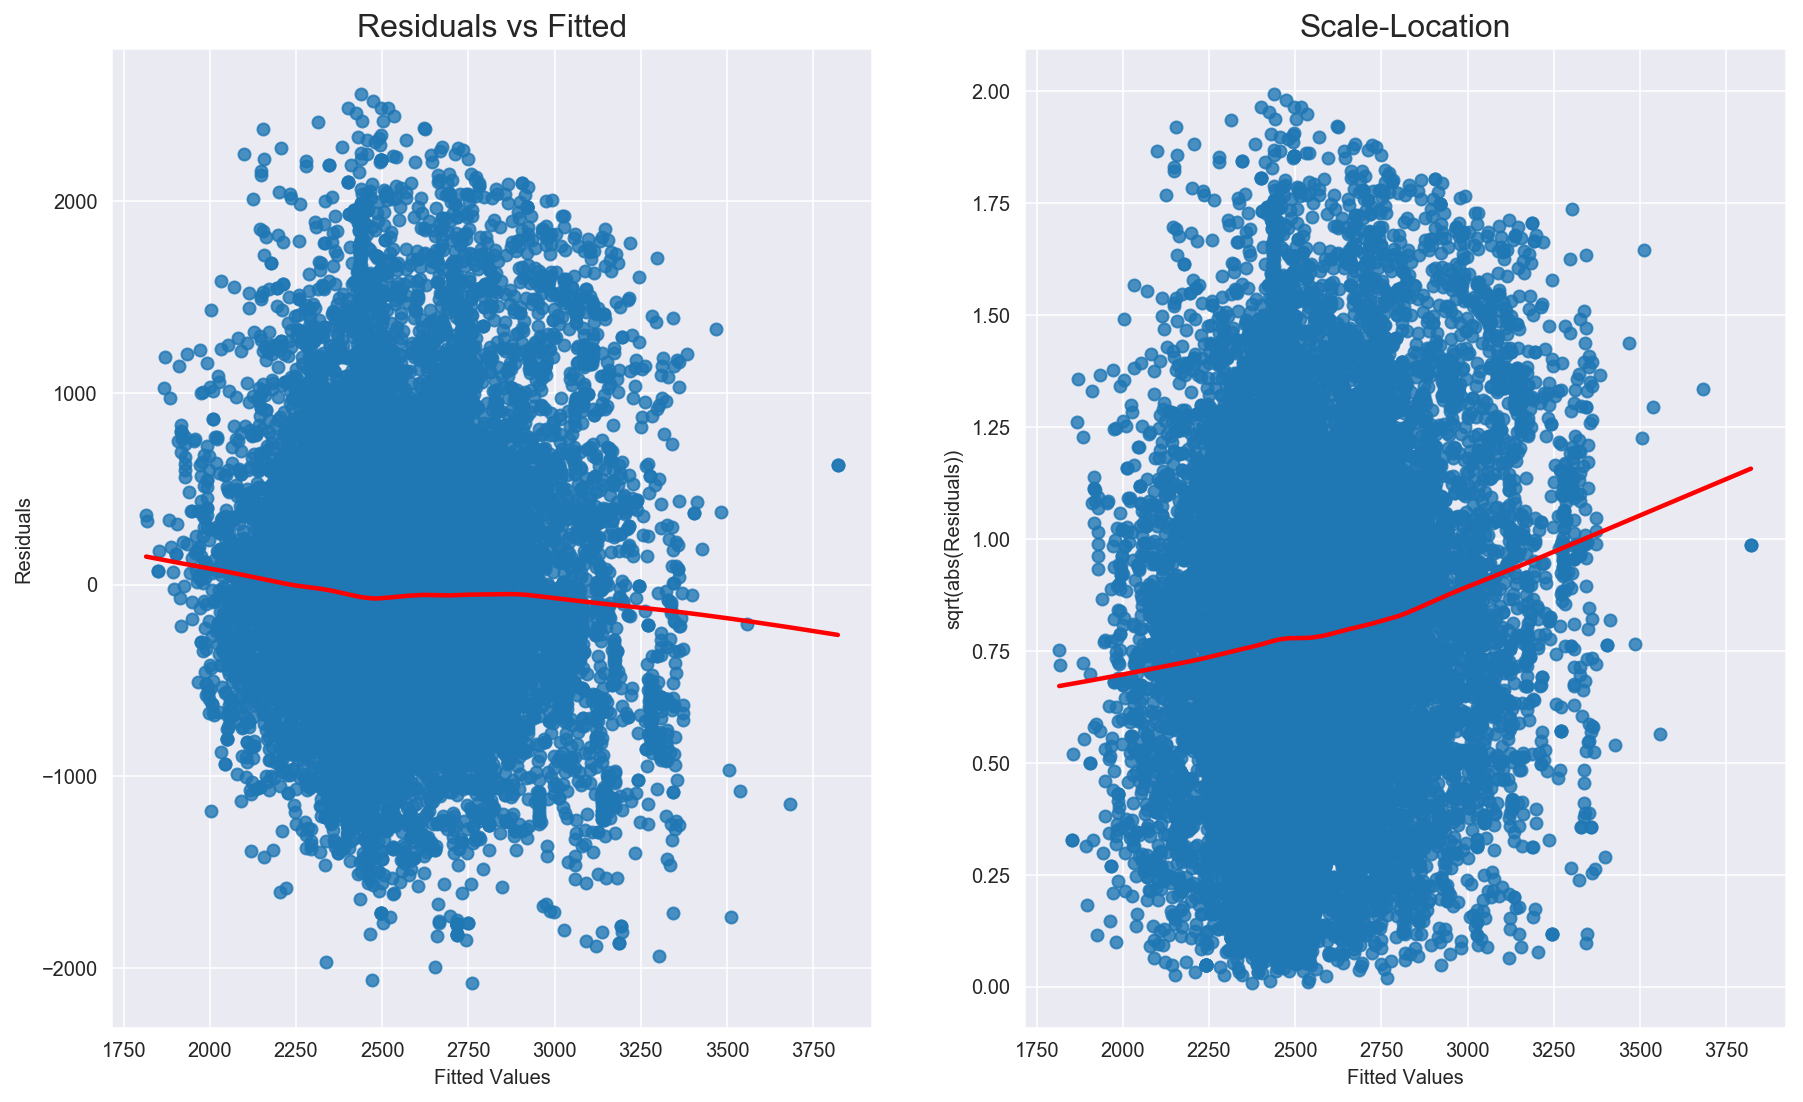

In [27]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
#import seaborn as sns 
#import matplotlib.pyplot as plt
import statsmodels.stats.api as sm
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model1):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    import numpy as np
    fitted_vals = model1.predict()
    resids = model1.resid
    resids_standardized = model1.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sm.het_breuschpagan(resids, model1.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sm.het_goldfeldquandt(resids, model1.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model)

La gráfica muestra que claramente este modelo no cumple el supuesto de homocedacia.
Por ende para sotear este incoveniente como dijimos antes podes aplicar alguna fucion logaritmica sobre las variables predictoras o sobre la variable target.

### Autocorrelación (que el residuo de una no me de info de la otra)
Otro de los supuestos detrás del modelo de regresión lineal es que los residuales no tienen autocorrelación seriál. Una serie está autocorrelacionada cuando tiene correlación con su serie rezagada. Por ejemplo las series financieras en su gran mayoría tienen autocorrelación serial.

Para investigar si la autocorrelación está presente, utilizo gráficos ACF (función de autocorrelación) y la prueba de Durbin-Watson.
En el primer caso, queremos ver si el valor de ACF es significativo para cualquier retraso (en caso de que no haya datos de series temporales, se utiliza el número de fila). Al llamar a la función, indicamos el nivel de significación en el que estamos interesados y el área crítica se traza en el gráfico. Las correlaciones significativas se encuentran fuera de esa área.

Nota: cuando se trata de datos sin la dimensión de tiempo, alternativamente podemos trazar los residuos frente al número de fila. En tales casos, las filas deben ordenarse de una manera que (solo) dependa de los valores de las características.

El segundo enfoque es utilizar la prueba de Durbin-Watson. No detallo cómo se construye, pero proporciono una descripción general de alto nivel. El estadístico de prueba proporciona una prueba de autocorrelación residual significativa en el retraso 1. El estadístico DW es aproximadamente igual a 2 (1-a), donde a es la autocorrelación residual del retraso 1. La estadística de prueba DW se encuentra en la salida predeterminada de la regresión con statsModels.

Algunas notas sobre la prueba de Durbin-Watson:
* El estadistico de prueba siempre tiene un valor entre 0 y 4
* El valor de 2 significa que no hay autocorrelación en la muestra
* Valores <2 indican autocorrelación positiva, valores > 2 negativo uno.
Si vamos a la celda donde obtuvimos el modelo vemos un DW = ???

C:\Users\ealvarez\Anaconda3\envs\dhdsblend\lib\site-packages\matplotlib\figure.py:459: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



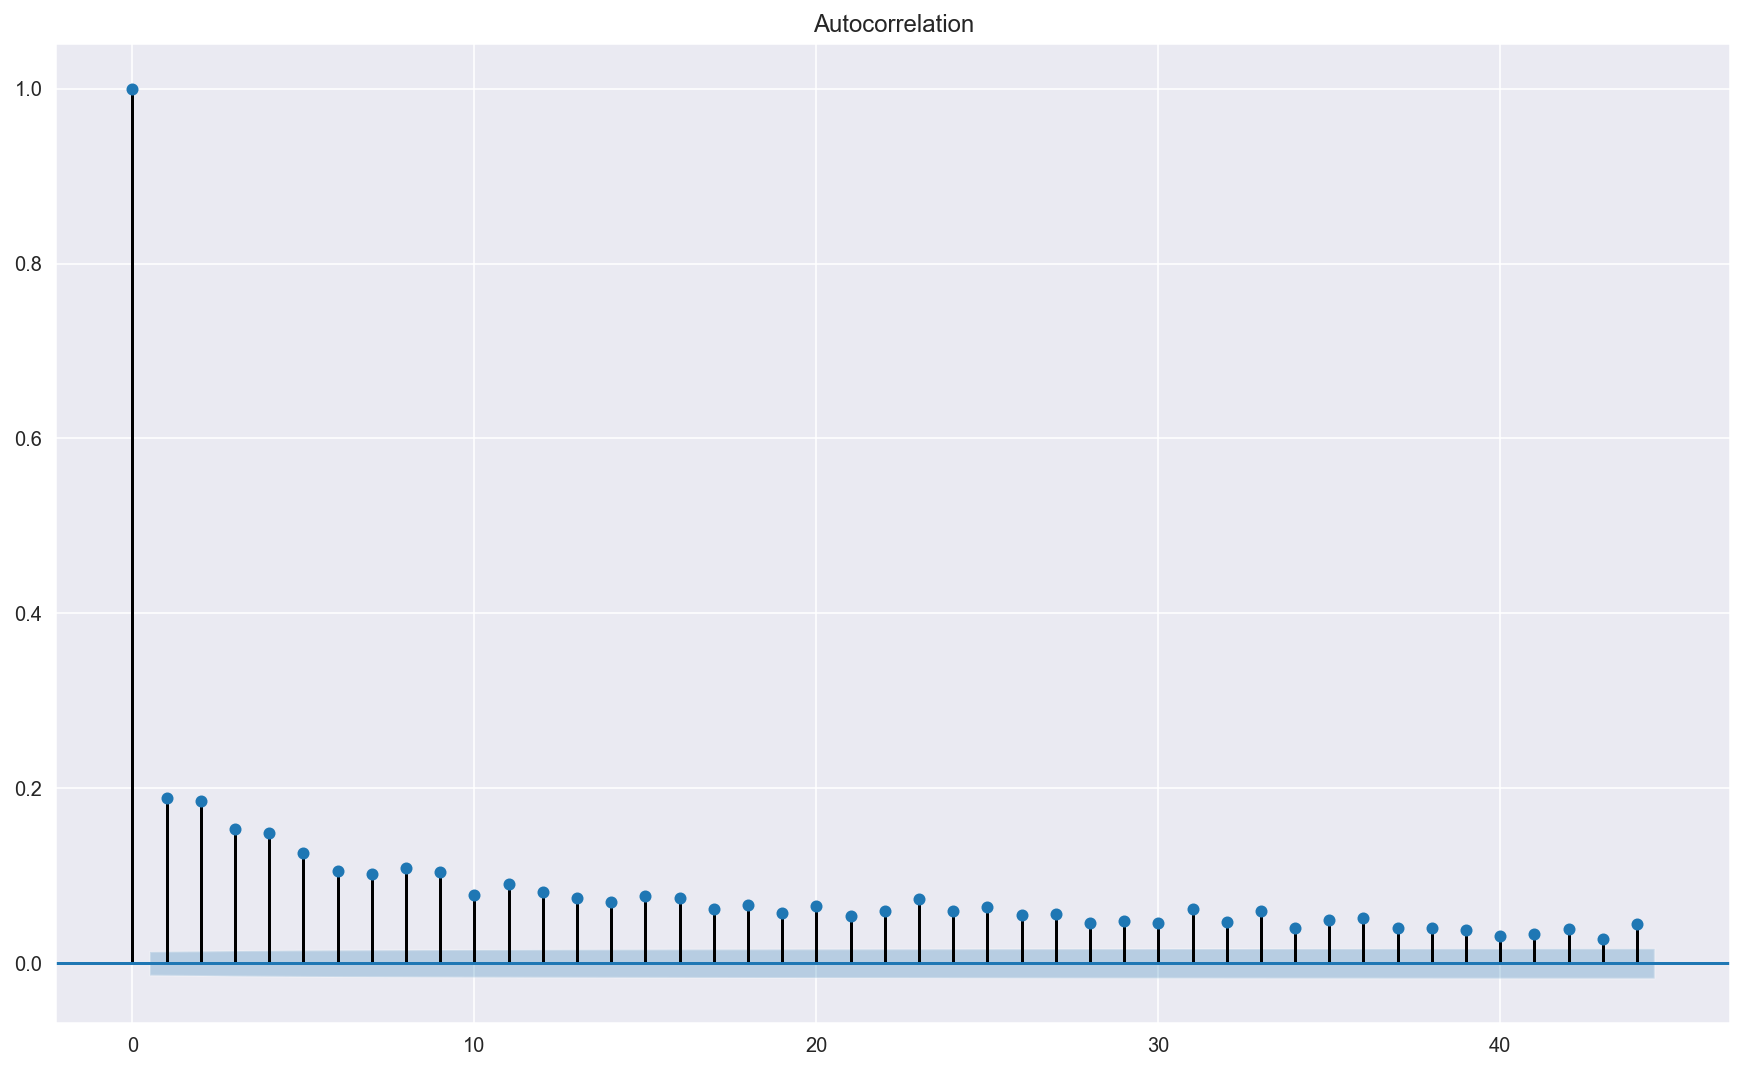

In [28]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model.resid, alpha=0.05)
acf.show()

In [29]:
# LOS VALORES QUE QUEDARON POR FUERA DEL AREA SOMBREADA, SU PROBABILIDAD ES SIGNIFICATIVAMENTE DISTINTA DE 0,
# ES DECIR, NO PODRÍA RECHAZAR LA Ho

### Normalidad de los residuos

Cuando se viola este supuesto , puede causar problemas al calcular los intervalos de confianza y varias pruebas de significancia para los coeficientes. Cuando la distribución del error se aleja significativamente de Gauss, los intervalos de confianza pueden ser demasiado amplios o demasiado estrechos.
Algunas de las posibles razones que causan residuos no normales:
* Presencia de algunos valores atípicos grandes en los datos
* Puede haber otros problemas (violaciones) con los supuestos del modelo
* Otra mejor especificación del modelo podría ser más adecuada para este problema.

Para investigar esta suposición podemos mirar:

* Gráficos QQ de los residuos. Por ejemplo, un patrón de desviaciones en forma de arco de la diagonal implica que los residuos tienen una inclinación excesiva (es decir, la distribución no es simétrica, con demasiados residuos grandes en una dirección). El patrón de desviaciones en forma de s implica una curtosis excesiva de los residuos: hay demasiados o dos pocos errores grandes en ambas direcciones.
*  Pruebas estadísticas como la prueba de Kolmogorov-Smirnov, la prueba de Shapiro-Wilk, la prueba de Jarque-Bera y la prueba de Anderson-Darling pueden ser utiles para evaluar este supuesto.

## NO LO LOGRO HACER ANDAR

from scipy import stats

import statsmodels.stats.api as sm
from matplotlib import pyplot as plt

def normality_of_residuals_test(model2):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    
    sm.ProbPlot(model2.resid).qqplot(line='s')

    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model2.resid)
    sw = stats.shapiro(model2.resid)
    ad = stats.anderson(model2.resid, dist='norm')
    ks = stats.kstest(model2.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(model)

## Eligiendo entre modelos

## OLS



In [30]:
# USANDO statsmodel
# Tenemos que agregar explícitamente a una constante:
import statsmodels.api as sm
X = dataf[feature_cols].astype(int)

X = sm.add_constant(X)   # este es la forma que da la librería para decirle que me estime la ordenada al origen
y = dataf.price_usd_per_m2

X_train, X_test, y_train, y_test = train_test_split(X, y)

R2:  0.12434808438292455


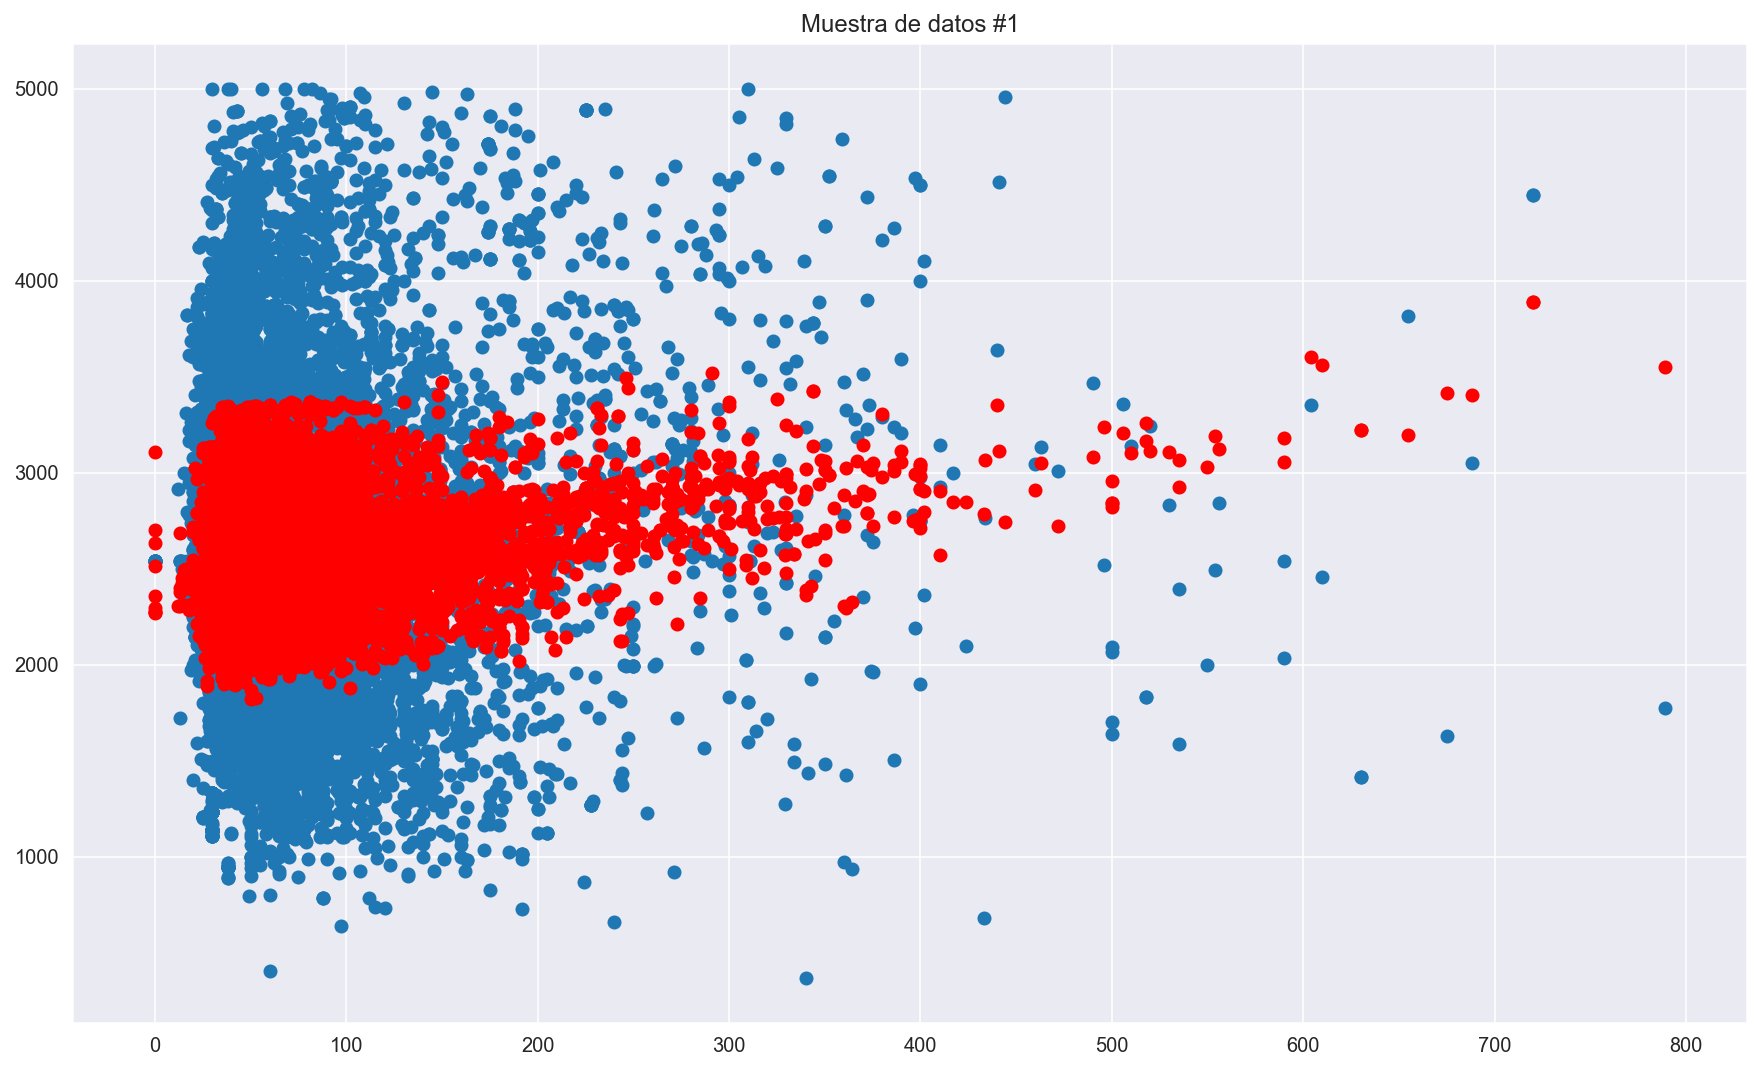

In [31]:
# USANDO statsmodel
olsm = sm.OLS(y_train, X_train).fit()
predictions = olsm.predict(X_train)

plt.scatter(X_train.surface_total_in_m2, y_train)

plt.title("Muestra de datos #1")
plt.scatter(X_train.surface_total_in_m2, predictions, c='r')
# EL R2:
print('R2: ', olsm.rsquared)

R2:  0.12434808438292455


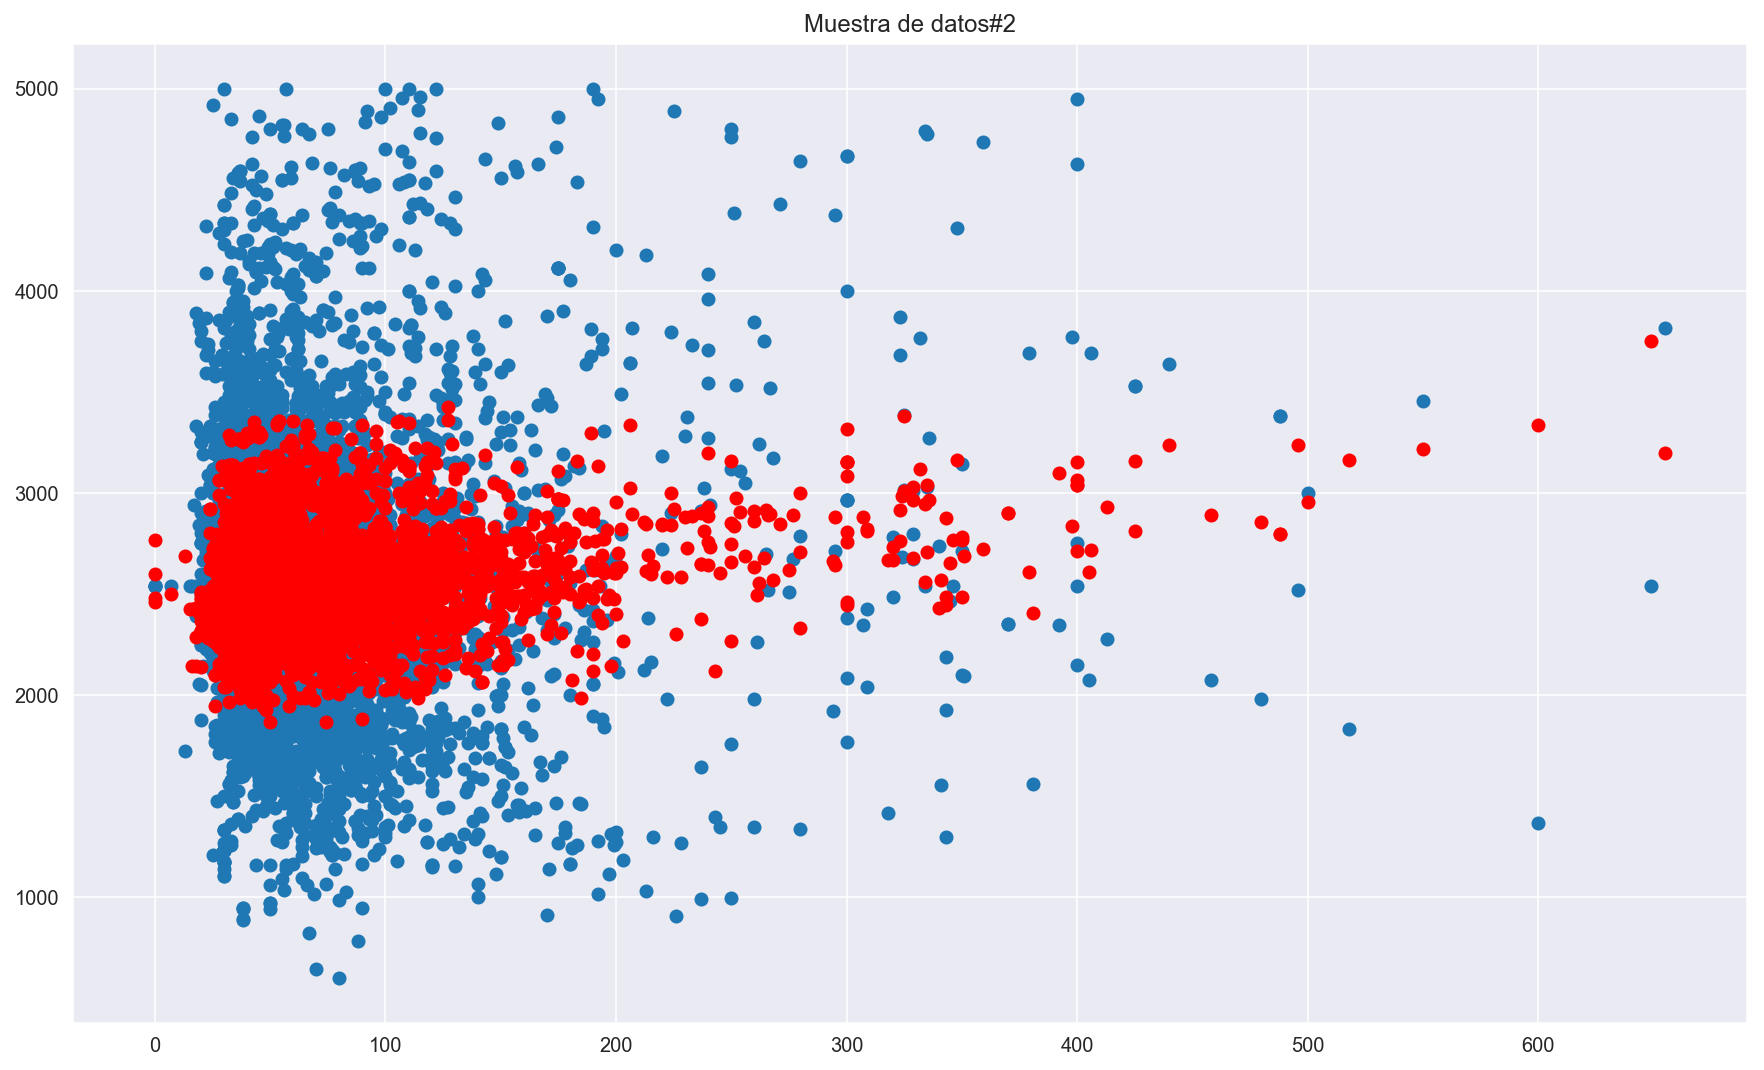

In [32]:
plt.scatter(X_test.surface_total_in_m2, y_test)
plt.title("Muestra de datos#2")

predictions = olsm.predict(X_test)
plt.scatter(X_test.surface_total_in_m2, predictions, c='r')
print('R2: ', olsm.rsquared) ### CÓMO OBTENGO LEL R2 DE TESTEO EN MODELO LINEAL???

## Ridge Regression

Usemos scikit-learn para ajustar una regresión con regularización, como la que describimos en el inicio del notebook. En particular, comenzaremos por la  _ridge regression_ en inglés. ¿Hace falta normalizar los features en este caso?

##### OJO QUE LOS BETA QUE OBTENEMOS ESTARÁN TAMBIÉN EN OTRA ESCALA, TAMBIÉN ESTARÁN NORMALIZADOS
##### SUPUESTAMENTE EL MÉTODO PREDICT TOMA LOS X Y LOS NORMALIZA ANTES DE PREDECIR, SI ASÍ LO SETIE EN EL MODELO.
##### SINO NO FUNCIONARÍA, O SI YO QUISIERA ARMAR EL MODELO CON LOS BETAS Y COEFICIENTES DEBERÍA NORMALIZAR LAS X

r^2: 0.12434807955755145


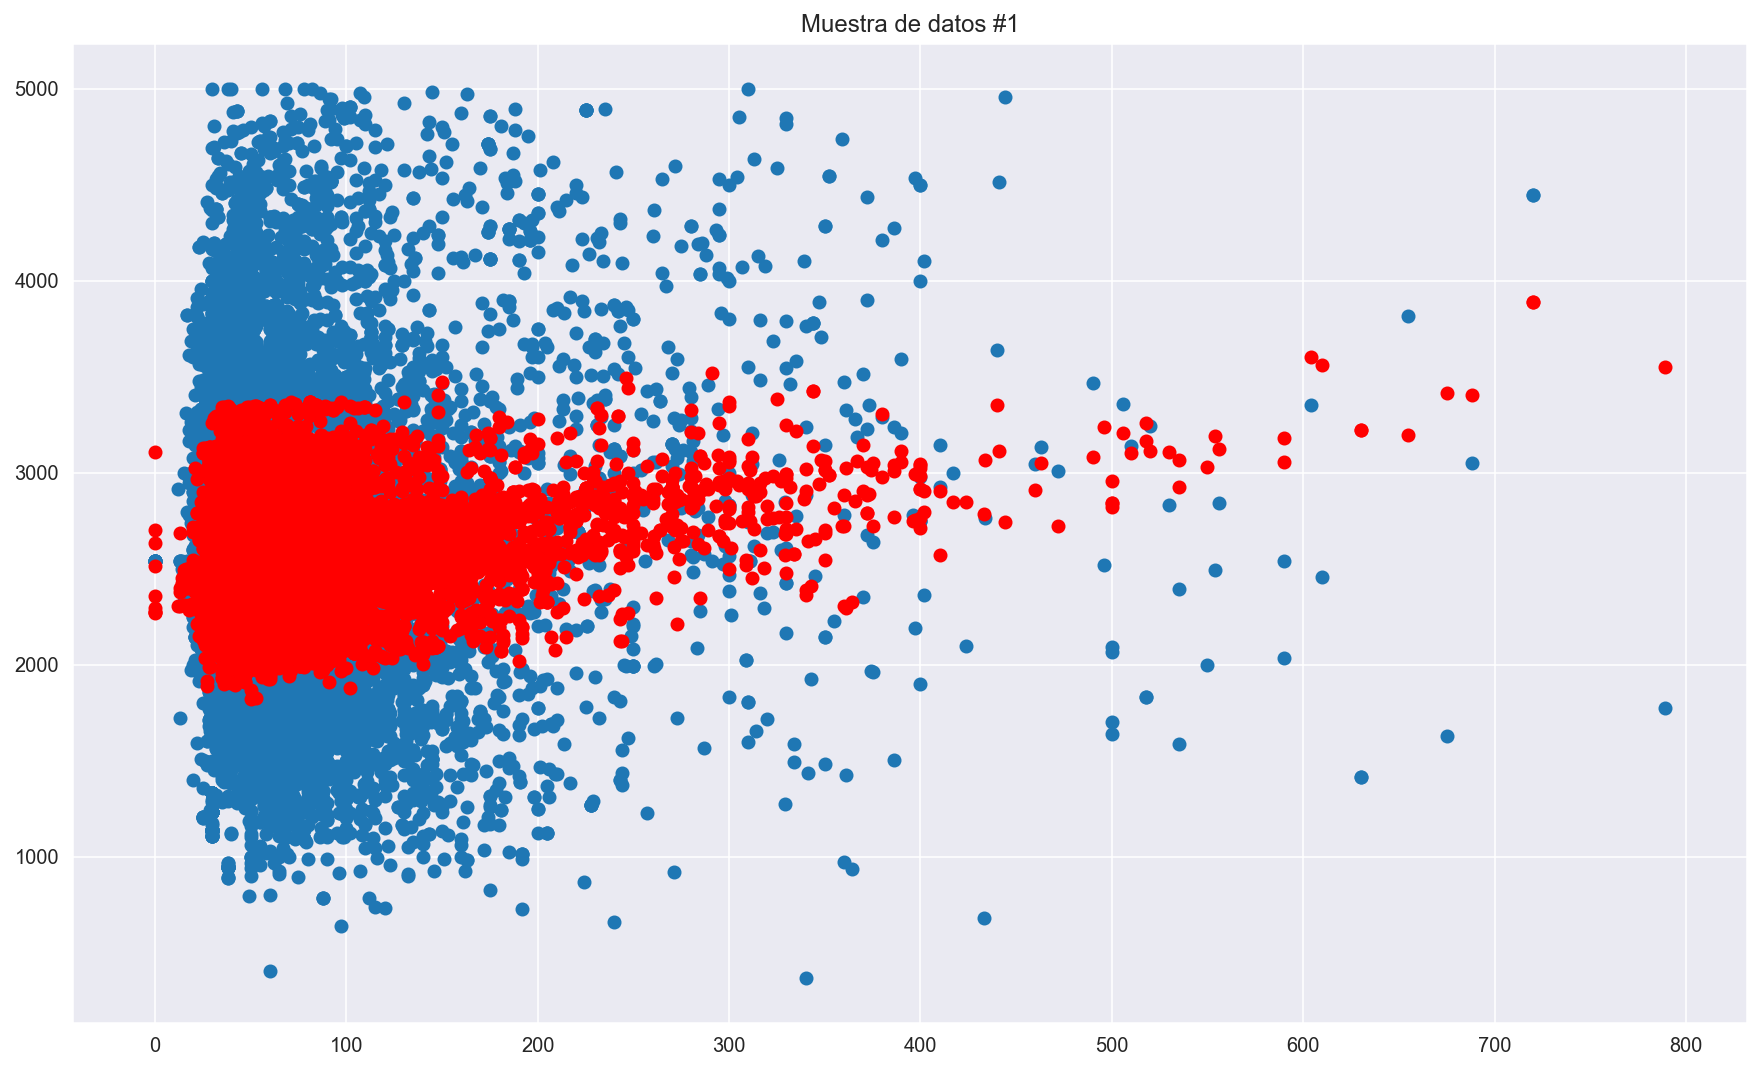

In [33]:
# X_train, X_test, y_train, y_test
# SIEMPRE NORMALIZAMOS CUANDO HACEMOS REGULARIZACIÓN (RIGDE, LASSO, ETC..) PORQUE SINO COMO LOS BETAS DE CADA
# FEATURE ESTÁN EN ESCALAS DIFERENTE, PENALIZARÍA MAS A FEATURES EN RANGOS MUY GRANDES,
# ES DECIR, PENALIZARÍA DIFERENTE A CADA FEATURE
# ADEMÁS, AYUDA AL TIEMPO DE PROCESAMIENTO
# OJO QUE LOS BETA QUE OBTENEMOS ESTARÁN TAMBIÉN EN OTRA ESCALA, TAMBIÉN ESTARÁN NORMALIZADOS

rlm = linear_model.Ridge(alpha=0.5, normalize=False)   # EN GENERAL SIEMPRESE SE HACE NORMALIZACIÓN CON RIDGE

# Ajustamos nuevamente, esta vez con regularizacion (RIDGE)
ridge_model = rlm.fit(X_train, y_train)
predictions = ridge_model.predict(X_train)
# SUPUESTAMENTE EL MÉTODO PREDICT TOMA LOS X Y LOS NORMALIZA ANTES DE PREDECIR, SI ASÍ LO SETIE EN EL MODELO.
# SINO NO FUNCIONARÍA, O SI YO QUISIERA ARMAR EL MODELO CON LOS BETAS Y CORFICIENTES YO DEBERÍA NORMALIZAR LAS X

plt.scatter(X_train.surface_total_in_m2, y_train)

plt.title("Muestra de datos #1")
plt.scatter(X_train.surface_total_in_m2, predictions, c='r')
print ("r^2:", ridge_model.score(X_train, y_train))

# EL R2 DE ENTRENAMIENTO SE MANTUVO CON RESPECTO A LA REGRESIÓN LINAL SIN AJUSTE (era 0.73)

r^2: 0.12501681501288764


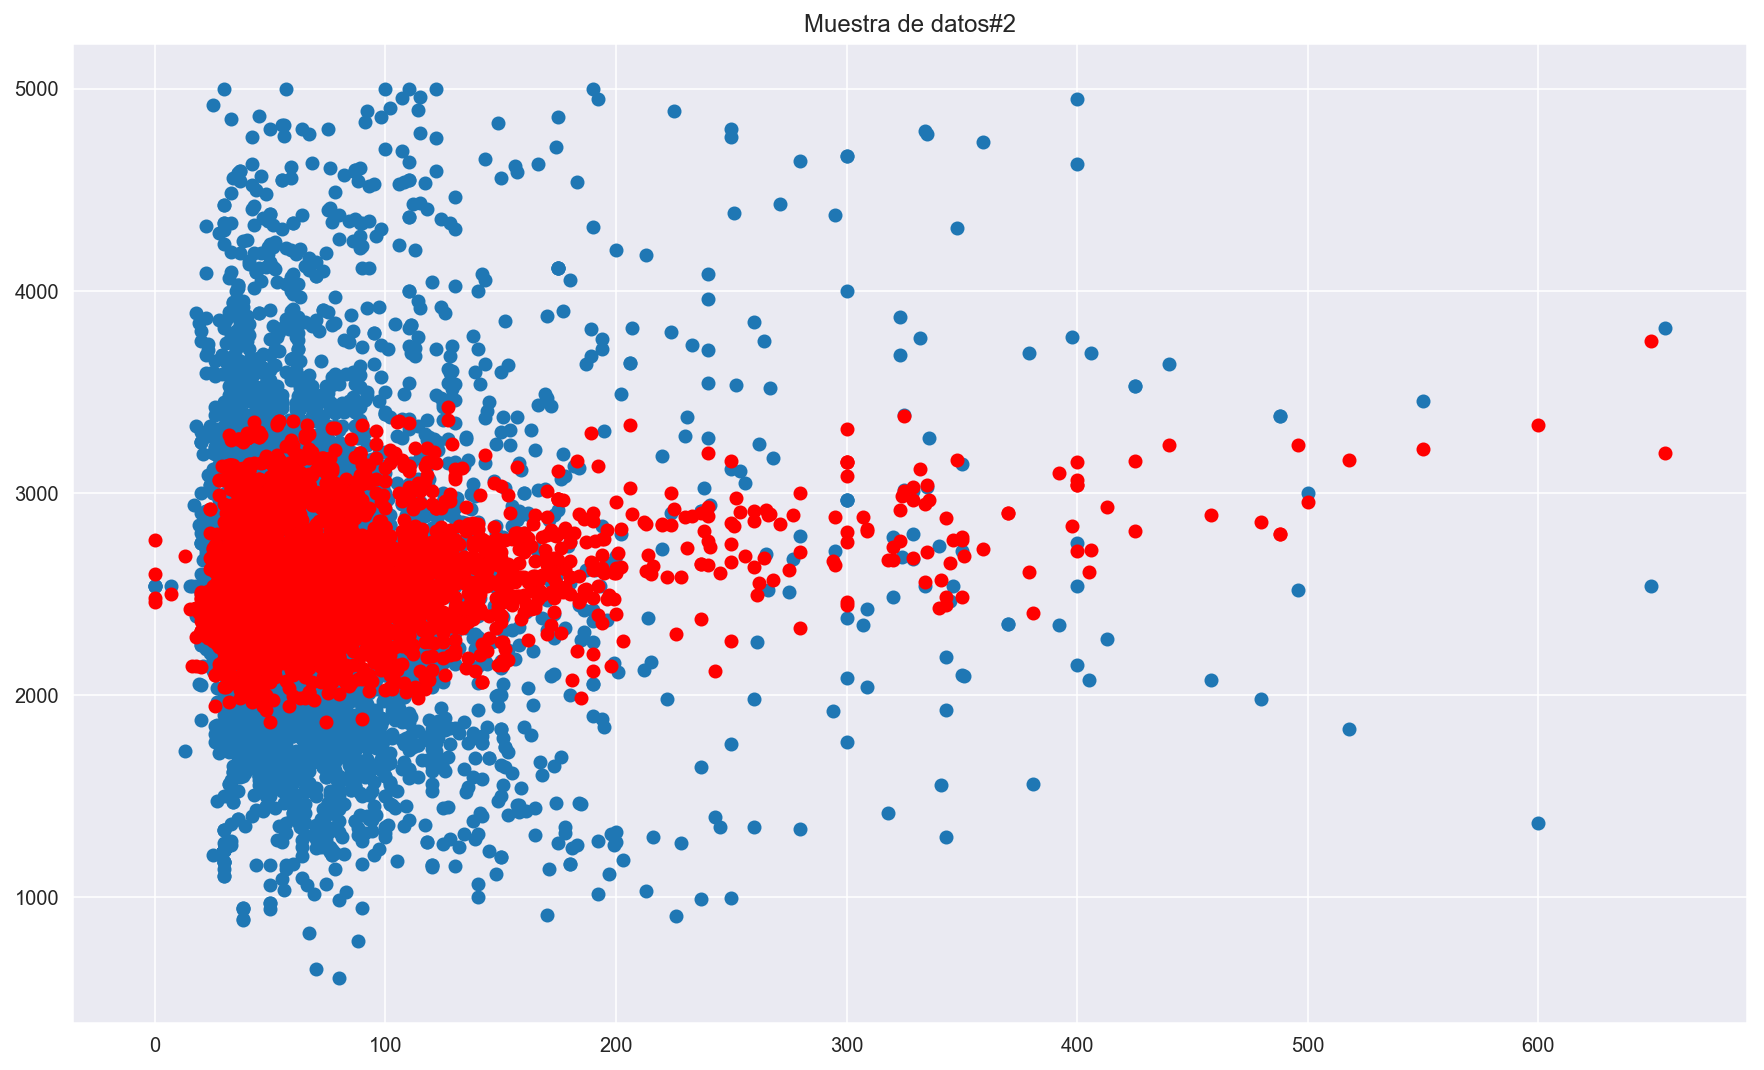

In [34]:
plt.scatter(X_test.surface_total_in_m2, y_test)
plt.title("Muestra de datos#2")

predictions = ridge_model.predict(X_test)
plt.scatter(X_test.surface_total_in_m2, predictions, c='r')
print ("r^2:", ridge_model.score(X_test, y_test))

## Lasso



¿Hace falta normalizar los features en este caso? 

##### OJO QUE LOS BETA QUE OBTENEMOS ESTARÁN TAMBIÉN EN OTRA ESCALA, TAMBIÉN ESTARÁN NORMALIZADOS
##### SUPUESTAMENTE EL MÉTODO PREDICT TOMA LOS X Y LOS NORMALIZA ANTES DE PREDECIR, SI ASÍ LO SETIE EN EL MODELO.
##### SINO NO FUNCIONARÍA, O SI YO QUISIERA ARMAR EL MODELO CON LOS BETAS Y COEFICIENTES DEBERÍA NORMALIZAR LAS X

r^2: 0.12429598676283304


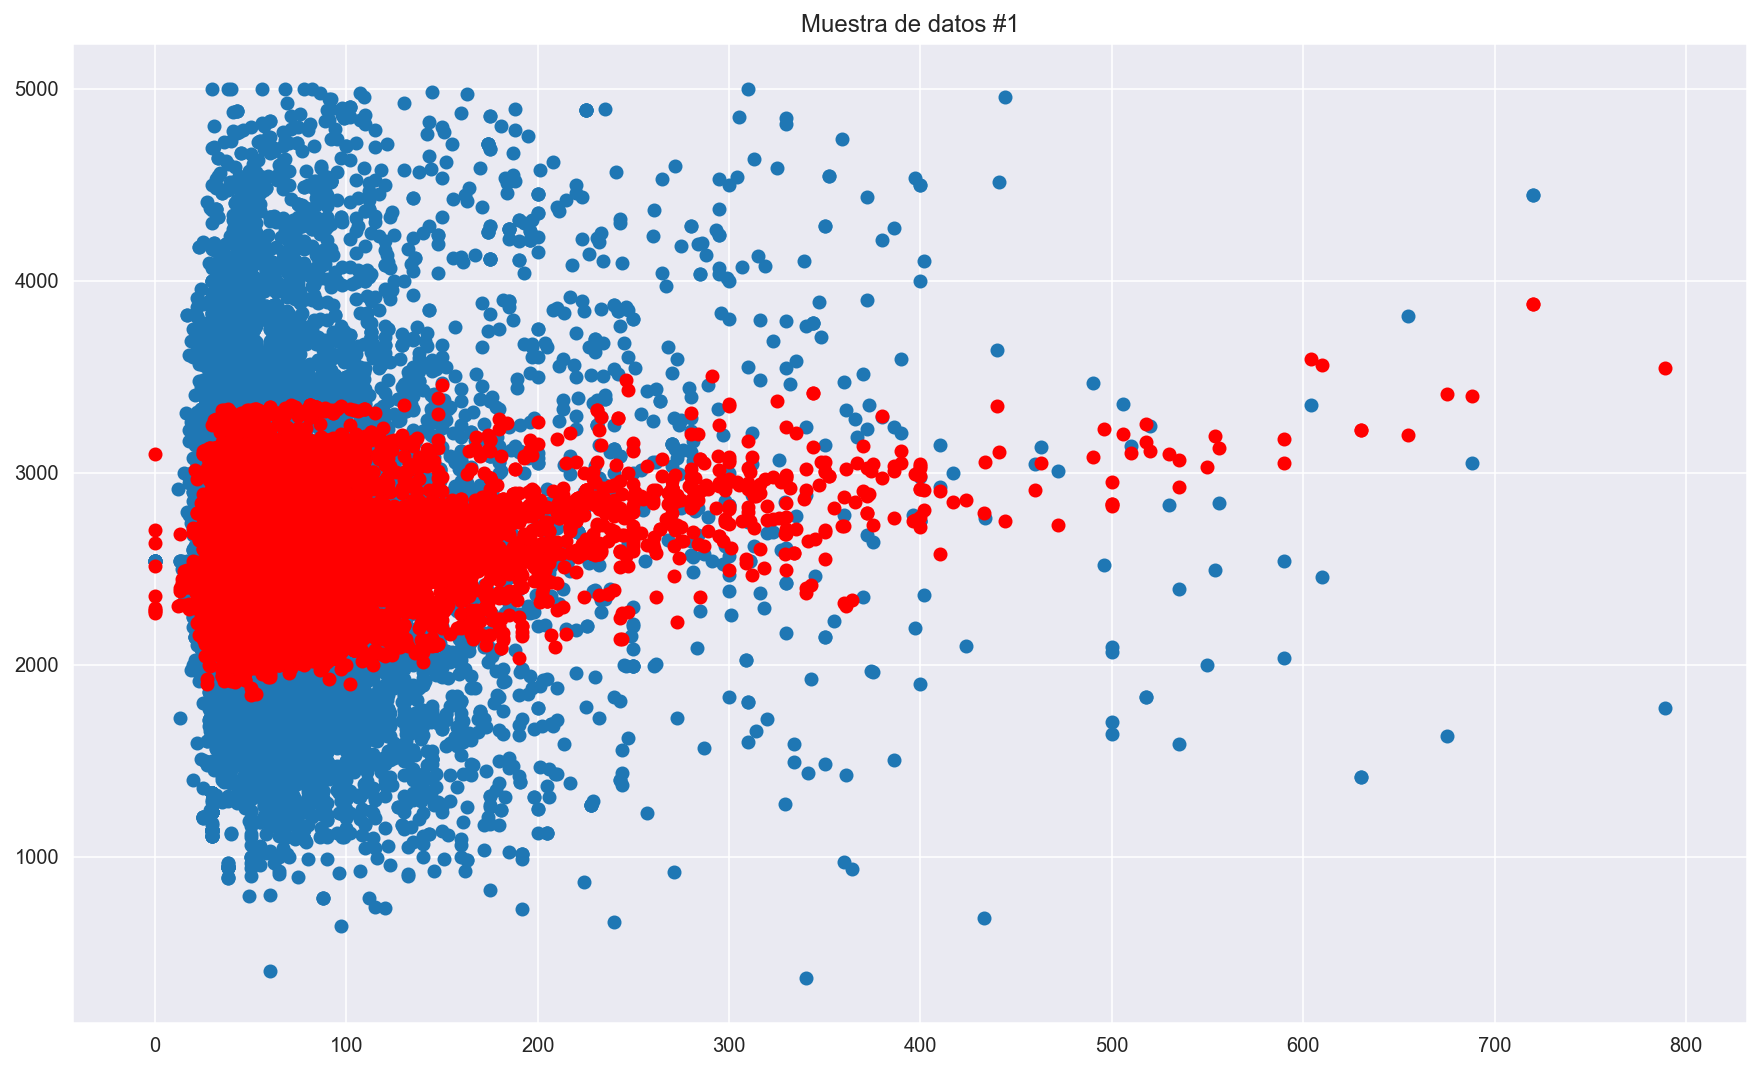

In [35]:
# X_train, X_test, y_train, y_test
lasso = linear_model.Lasso(alpha=0.5, normalize=False) # SIEMPRE HACER NORMALIZACIÓN CON LASSO

# Ajustamos nuevamente, esta vez con regularizacion (LASSO)
lasso_model =lasso.fit(X_train, y_train)
predictions = lasso_model.predict(X_train)

plt.scatter(X_train.surface_total_in_m2, y_train)
plt.title("Muestra de datos #1")
plt.scatter(X_train.surface_total_in_m2, predictions, c='r')

print ("r^2:", lasso_model.score(X_train, y_train))

# EL R2 DE ENTRENAMIENTO ES MEJOR QUE RIDGE PERO BAJÓ CON RESPECTO A LA REGRESIÓN LINAL SIN AJUSTE


r^2: 0.124884143389441


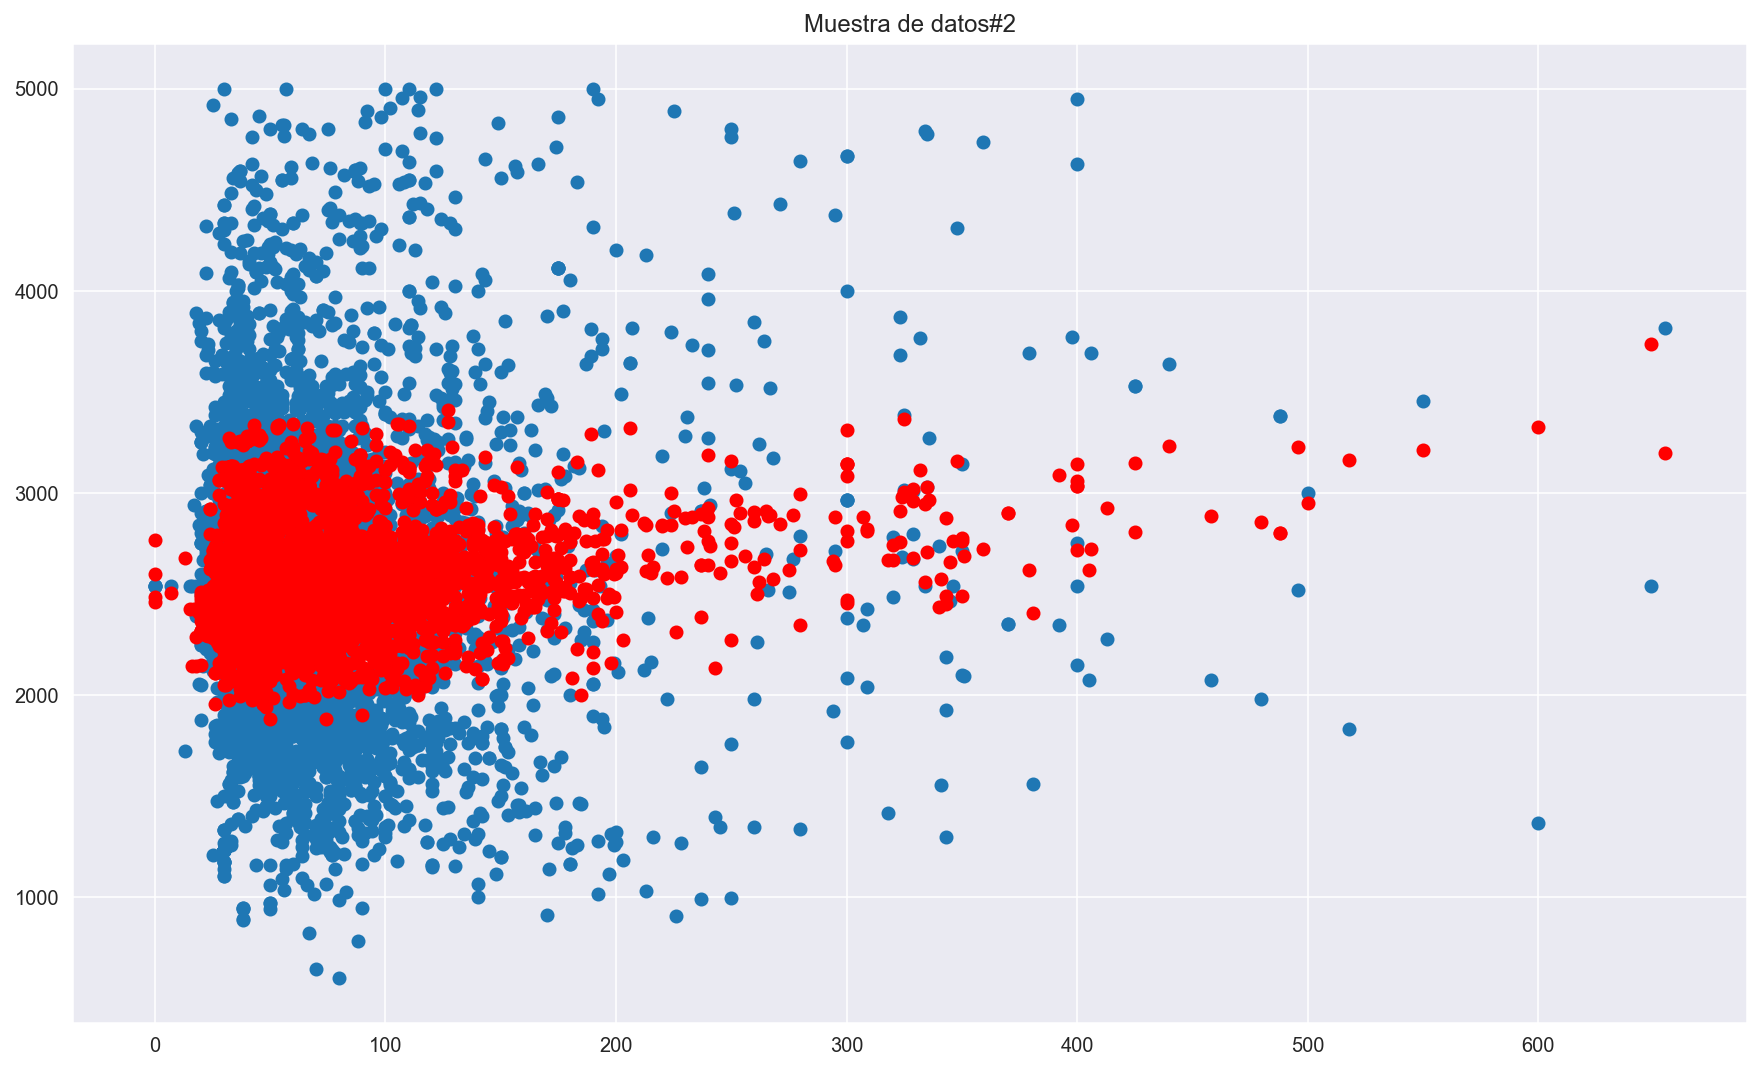

In [36]:
plt.scatter(X_test.surface_total_in_m2, y_test)
plt.title("Muestra de datos#2")

predictions = lasso_model.predict(X_test)
plt.scatter(X_test.surface_total_in_m2, predictions, c='r')
print ("r^2:", lasso_model.score(X_test, y_test))

## ElasticNet

¿Hace falta normalizar los features en este caso? 

##### OJO QUE LOS BETA QUE OBTENEMOS ESTARÁN TAMBIÉN EN OTRA ESCALA, TAMBIÉN ESTARÁN NORMALIZADOS
##### SUPUESTAMENTE EL MÉTODO PREDICT TOMA LOS X Y LOS NORMALIZA ANTES DE PREDECIR, SI ASÍ LO SETIE EN EL MODELO.
##### SINO NO FUNCIONARÍA, O SI YO QUISIERA ARMAR EL MODELO CON LOS BETAS Y COEFICIENTES DEBERÍA NORMALIZAR LAS X

r^2: 0.0890011354132445


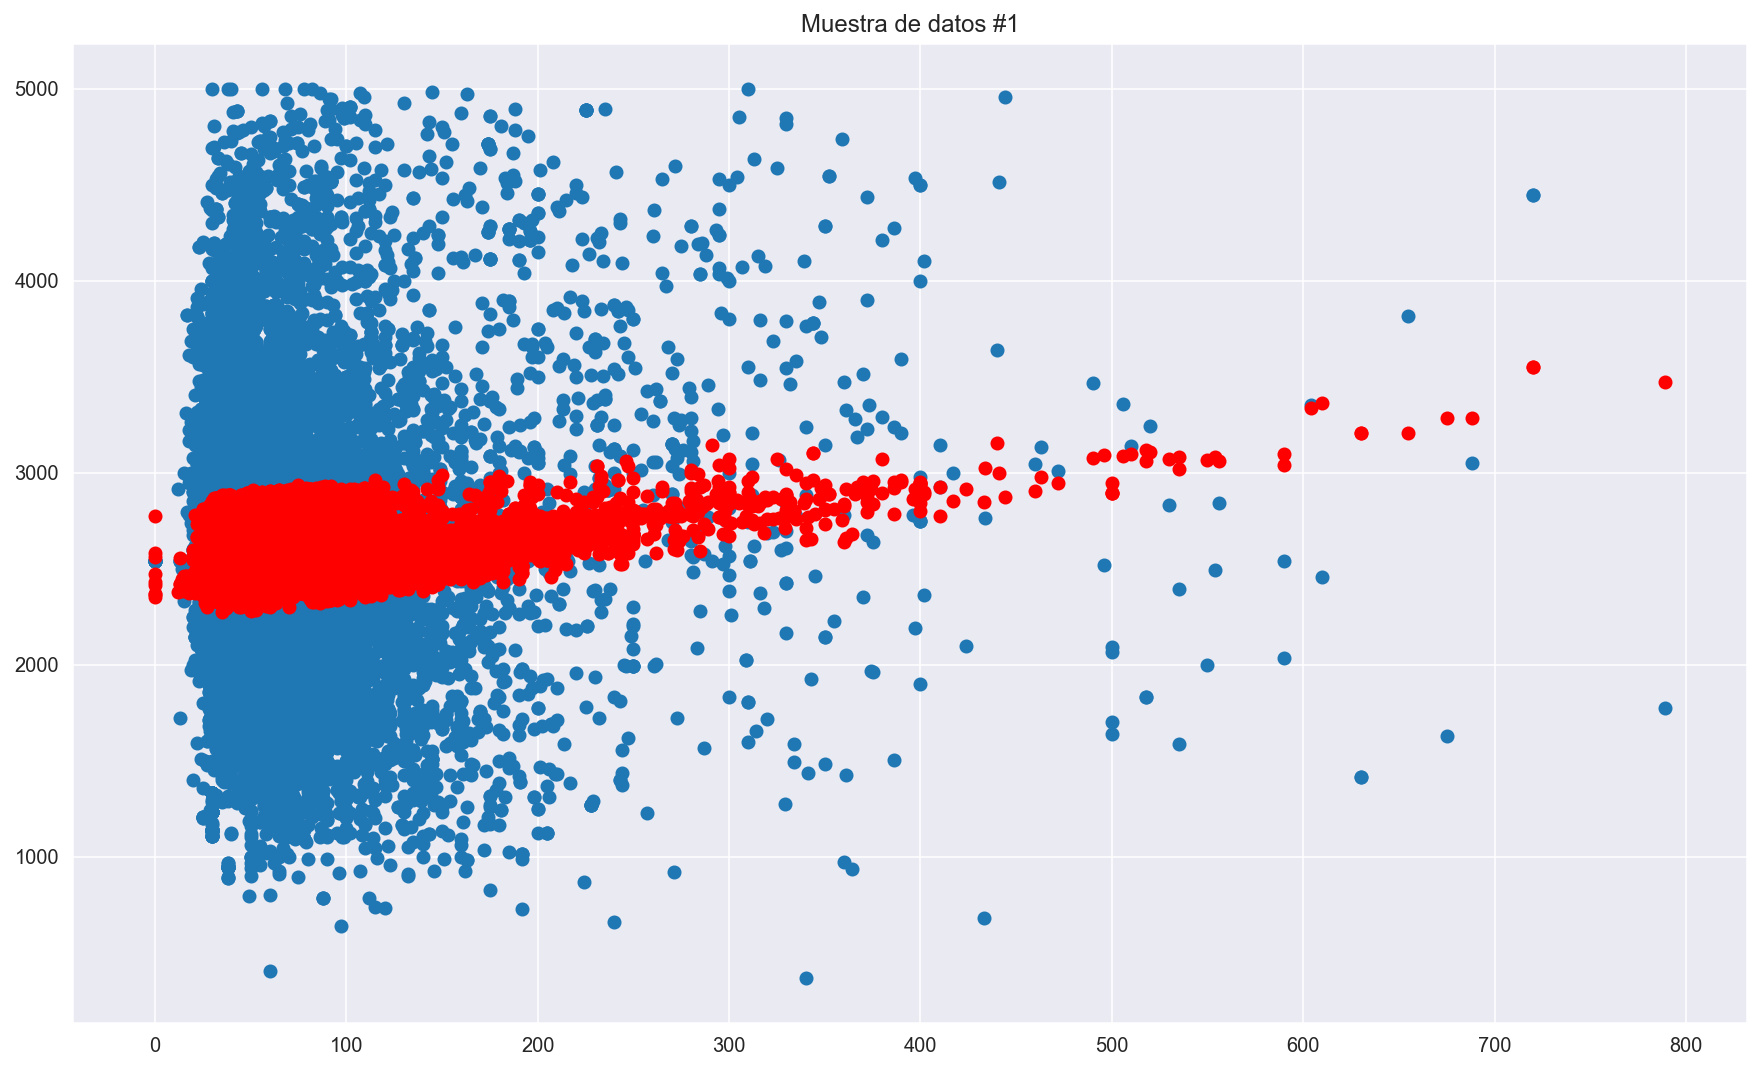

In [37]:
# X_train, X_test, y_train, y_test
elastic_net = linear_model.ElasticNet(alpha=0.5, normalize=False)  # SIEMPRE NORMALIZA
# ESTA TIENE TAMBIÉN HIPERPARÁMETROS ALPHA y l1_ratio. ACÁ SÓLO SETIO EL ALPHA.

# Ajustamos nuevamente, esta vez con regularizacion
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_train)

plt.scatter(X_train.surface_total_in_m2, y_train)
plt.title("Muestra de datos #1")
plt.scatter(X_train.surface_total_in_m2, predictions, c='r')

print ("r^2:", elastic_net.score(X_train, y_train))
#BAJA MUCHO

r^2: 0.08761048285576878


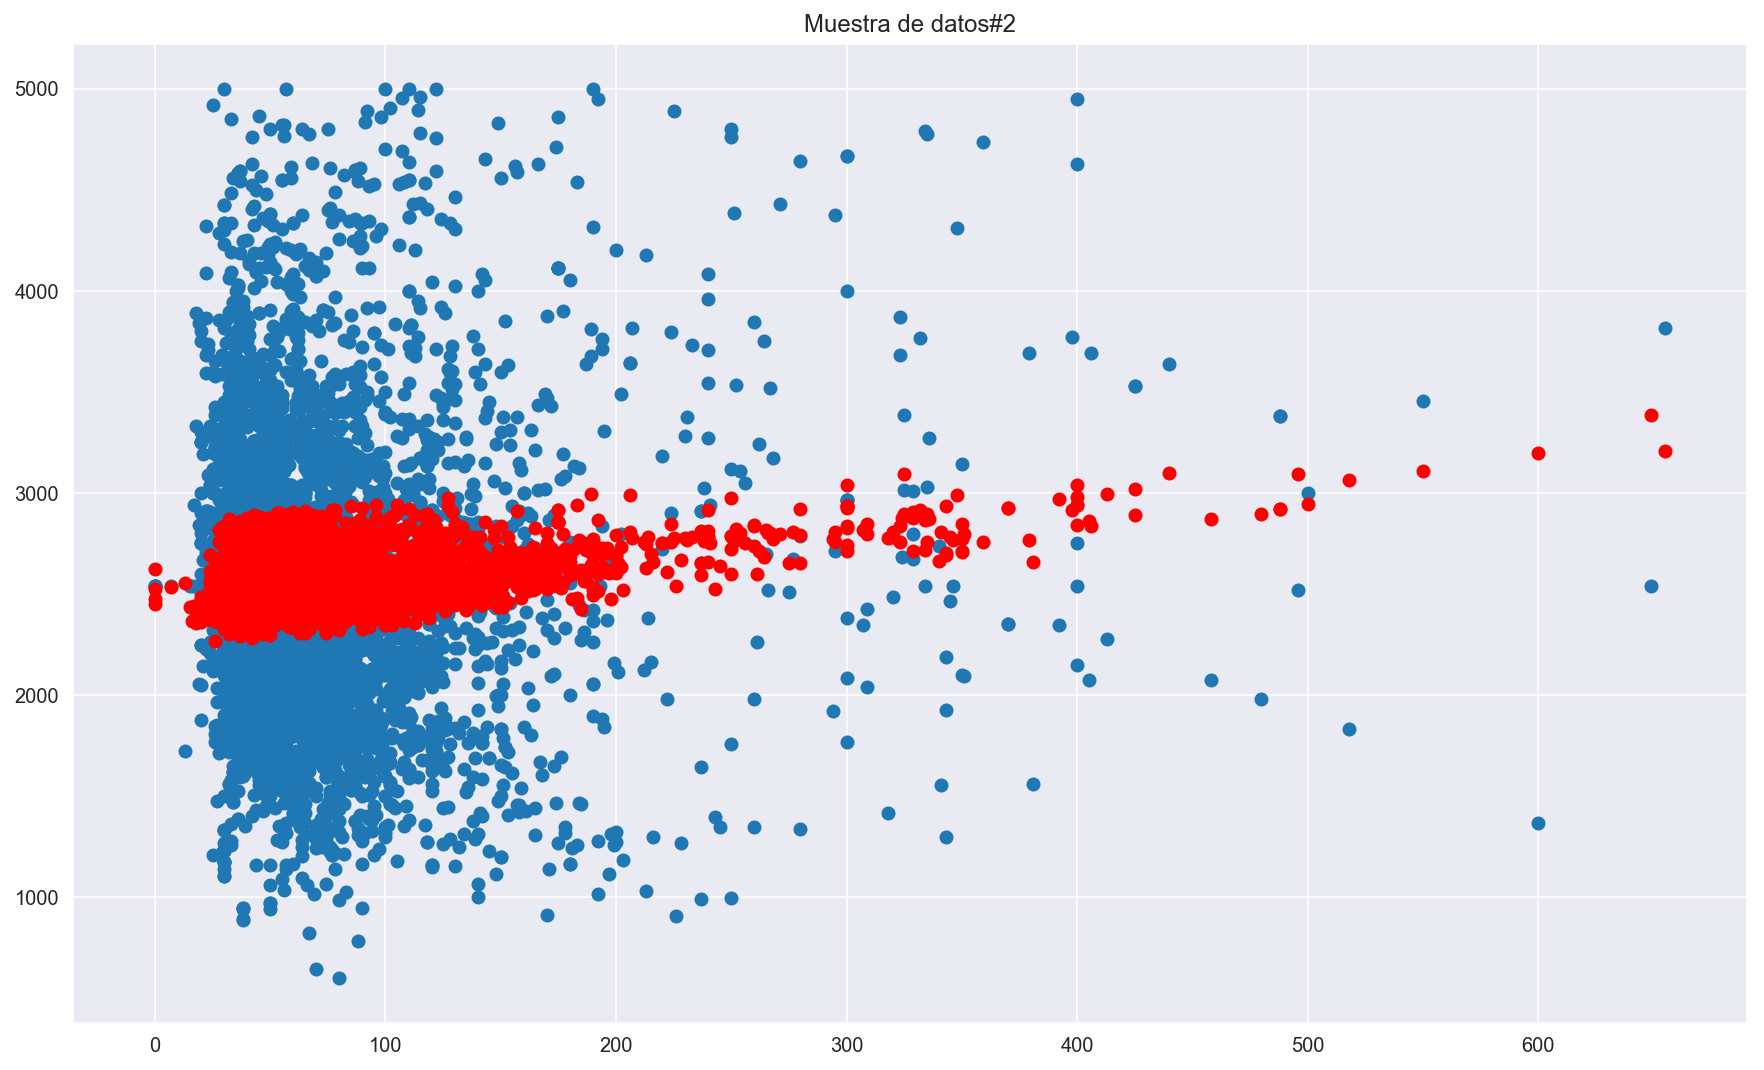

In [38]:
plt.scatter(X_test.surface_total_in_m2, y_test)
plt.title("Muestra de datos#2")

predictions = elastic_net.predict(X_test)
plt.scatter(X_test.surface_total_in_m2, predictions, c='r')
print ("r^2:", elastic_net.score(X_test, y_test))

## CROSS-VALIDATION

### Ridge CV (Cross Validation)


##### OJO QUE LOS BETA QUE OBTENEMOS ESTARÁN TAMBIÉN EN OTRA ESCALA, TAMBIÉN ESTARÁN NORMALIZADOS
##### SUPUESTAMENTE EL MÉTODO PREDICT TOMA LOS X Y LOS NORMALIZA ANTES DE PREDECIR, SI ASÍ LO SETIE EN EL MODELO.
##### SINO NO FUNCIONARÍA, O SI YO QUISIERA ARMAR EL MODELO CON LOS BETAS Y COEFICIENTES DEBERÍA NORMALIZAR LAS X ANTES

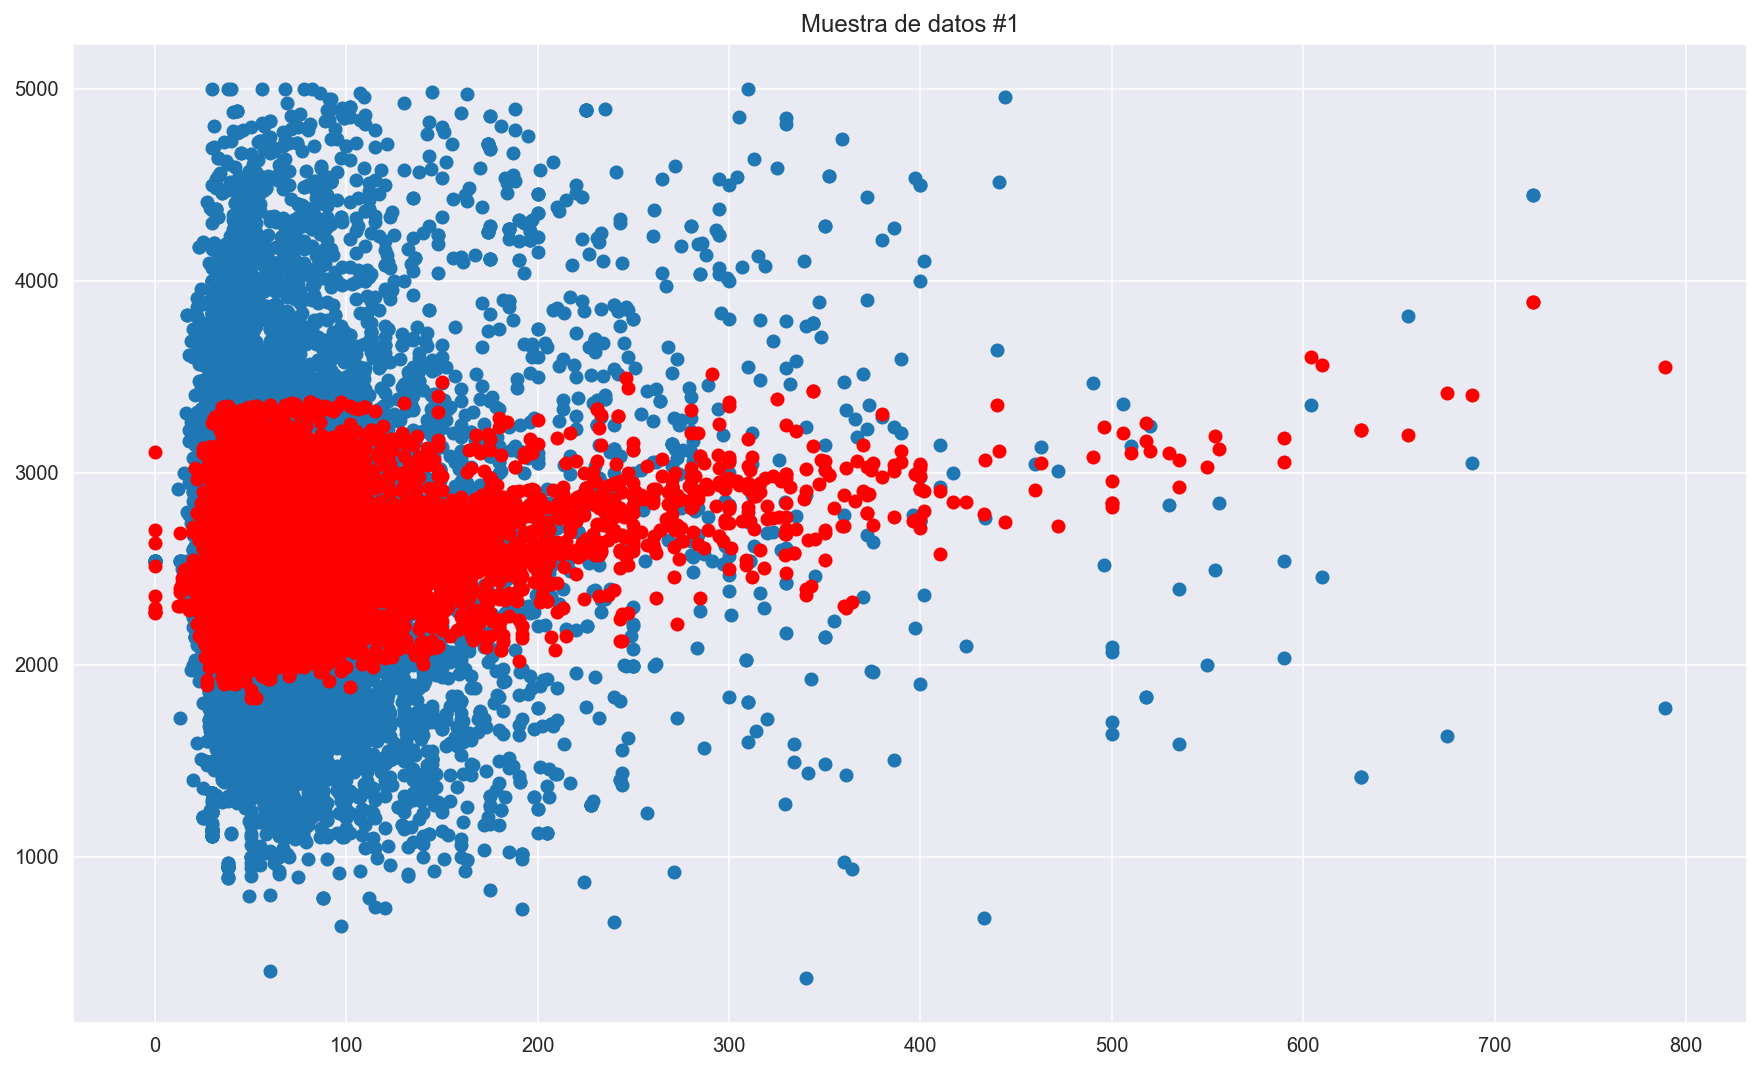

r^2 entrenamiento: 0.12434760444301907
alpha: 5.0


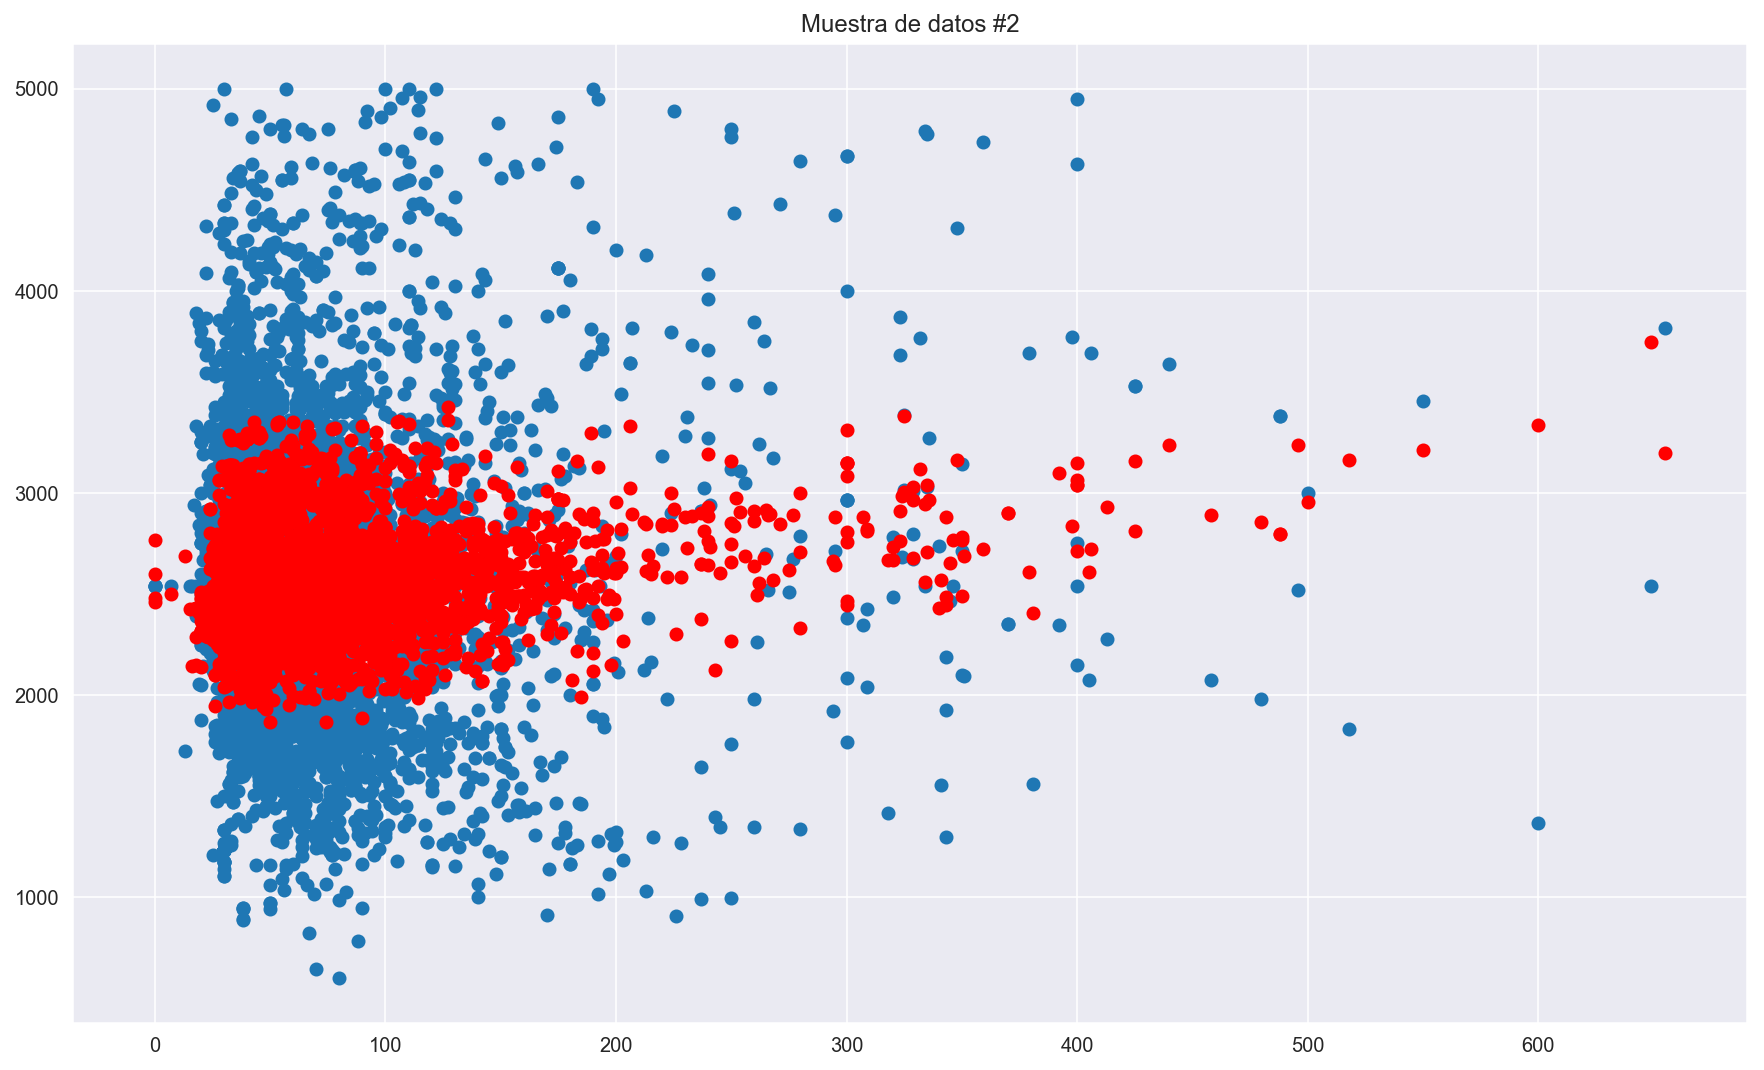

r^2 tests: 0.12501341923931075


In [39]:
# X_train, X_test, y_train, y_test
# instanciamos un modelo 
rlmcv = linear_model.RidgeCV(alphas=np.linspace(0.1,5, 1000), cv=5, normalize=False, scoring='r2') # no normalizamos

# Ajustamos nuevamente nuestro modelo, esta vez con RidgeCV
rlmcv.fit(X_train, y_train)
predictions = rlmcv.predict(X_train)

plt.scatter(X_train.surface_total_in_m2, y_train)
plt.title("Muestra de datos #1")
plt.scatter(X_train.surface_total_in_m2, predictions, c='r')
plt.show()
print ("r^2 entrenamiento:", rlmcv.score(X_train, y_train))
print ("alpha:", rlmcv.alpha_)

# ahora con datos de TEST
predictions = rlmcv.predict(X_test)

plt.scatter(X_test.surface_total_in_m2, y_test)
plt.title("Muestra de datos #2")
plt.scatter(X_test.surface_total_in_m2, predictions, c='r')
plt.show()
print ("r^2 tests:", rlmcv.score(X_test, y_test))

## si OBTUVO UN ALPHA CERCA DEL BORDE INFERIOR QUE LE PASÉ- PODRÍA HACER OTRO CROsS-VALIDATION 
## CON ALPHAS ENTRE 0,01 y 0,1.. es decir, crear otra ventana  de alphas

### Lasso CV (Cross Validation)


##### OJO QUE LOS BETA QUE OBTENEMOS ESTARÁN TAMBIÉN EN OTRA ESCALA, TAMBIÉN ESTARÁN NORMALIZADOS
##### SUPUESTAMENTE EL MÉTODO PREDICT TOMA LOS X Y LOS NORMALIZA ANTES DE PREDECIR, SI ASÍ LO SETIE EN EL MODELO.
##### SINO NO FUNCIONARÍA, O SI YO QUISIERA ARMAR EL MODELO CON LOS BETAS Y COEFICIENTES DEBERÍA NORMALIZAR LAS X ANTES

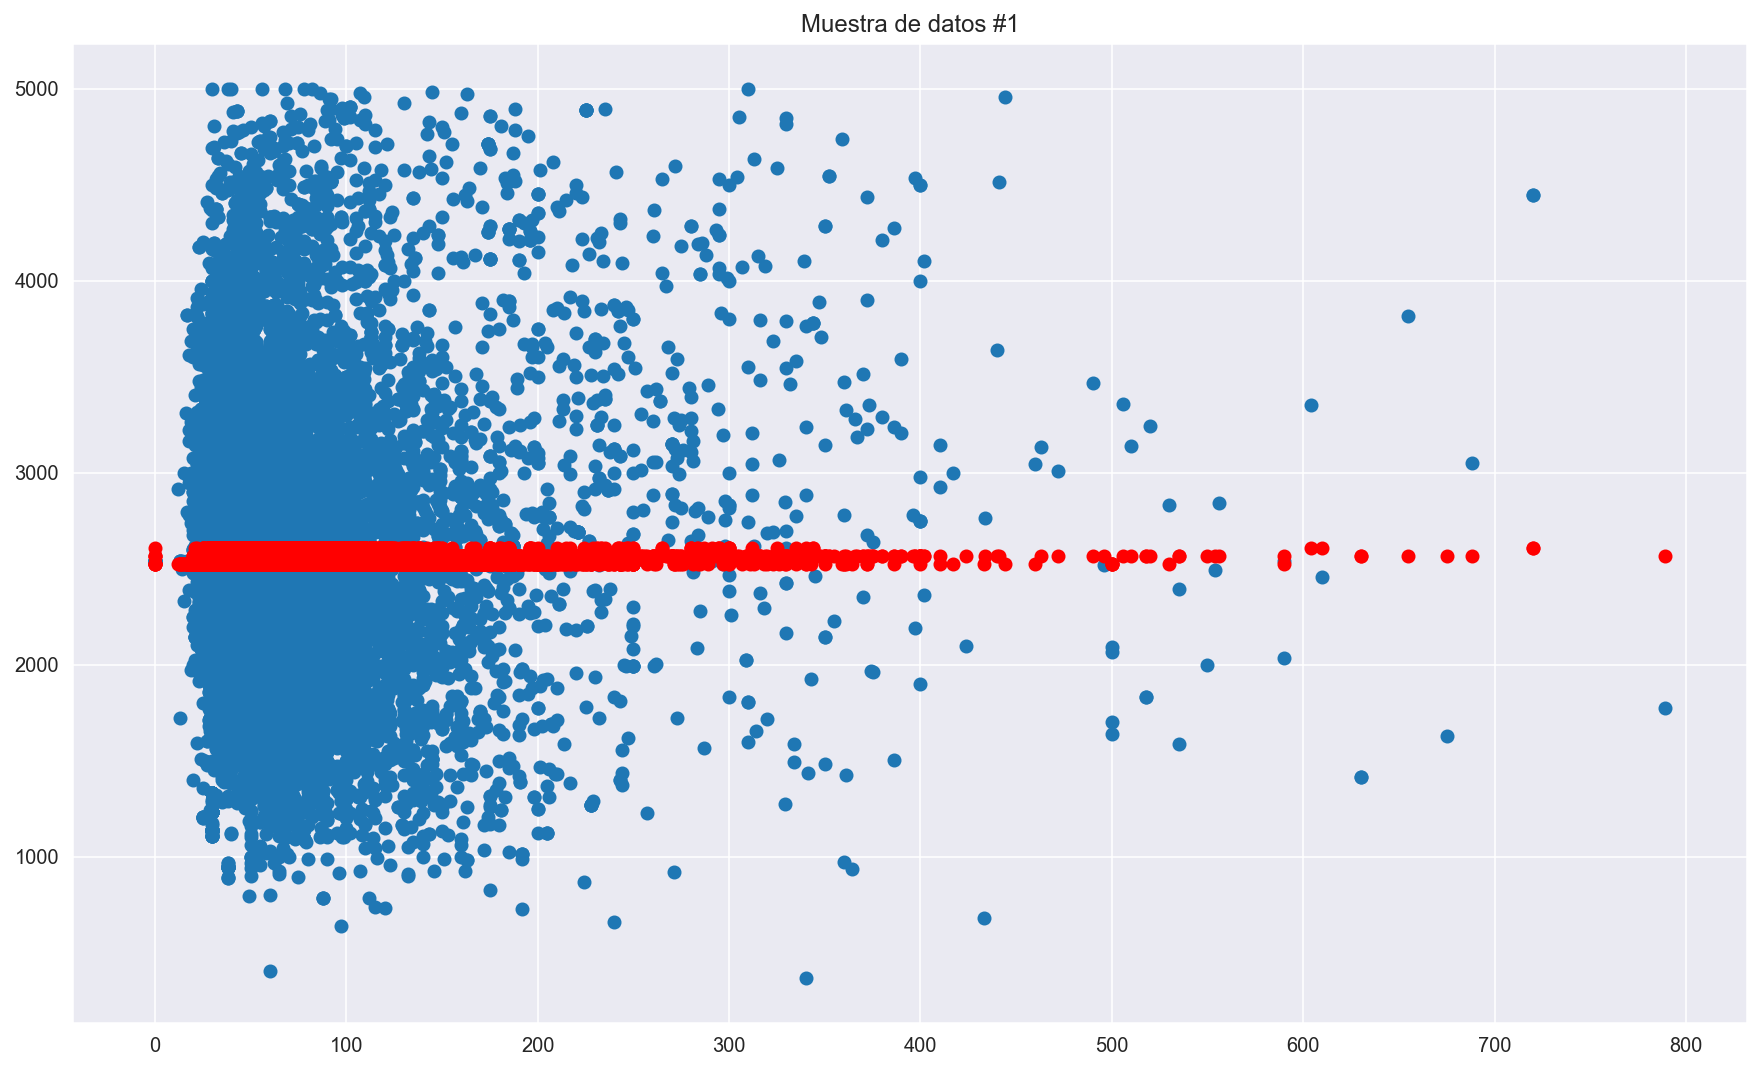

r^2 entrenamiento: 0.019456023616582385
alpha: 1.0


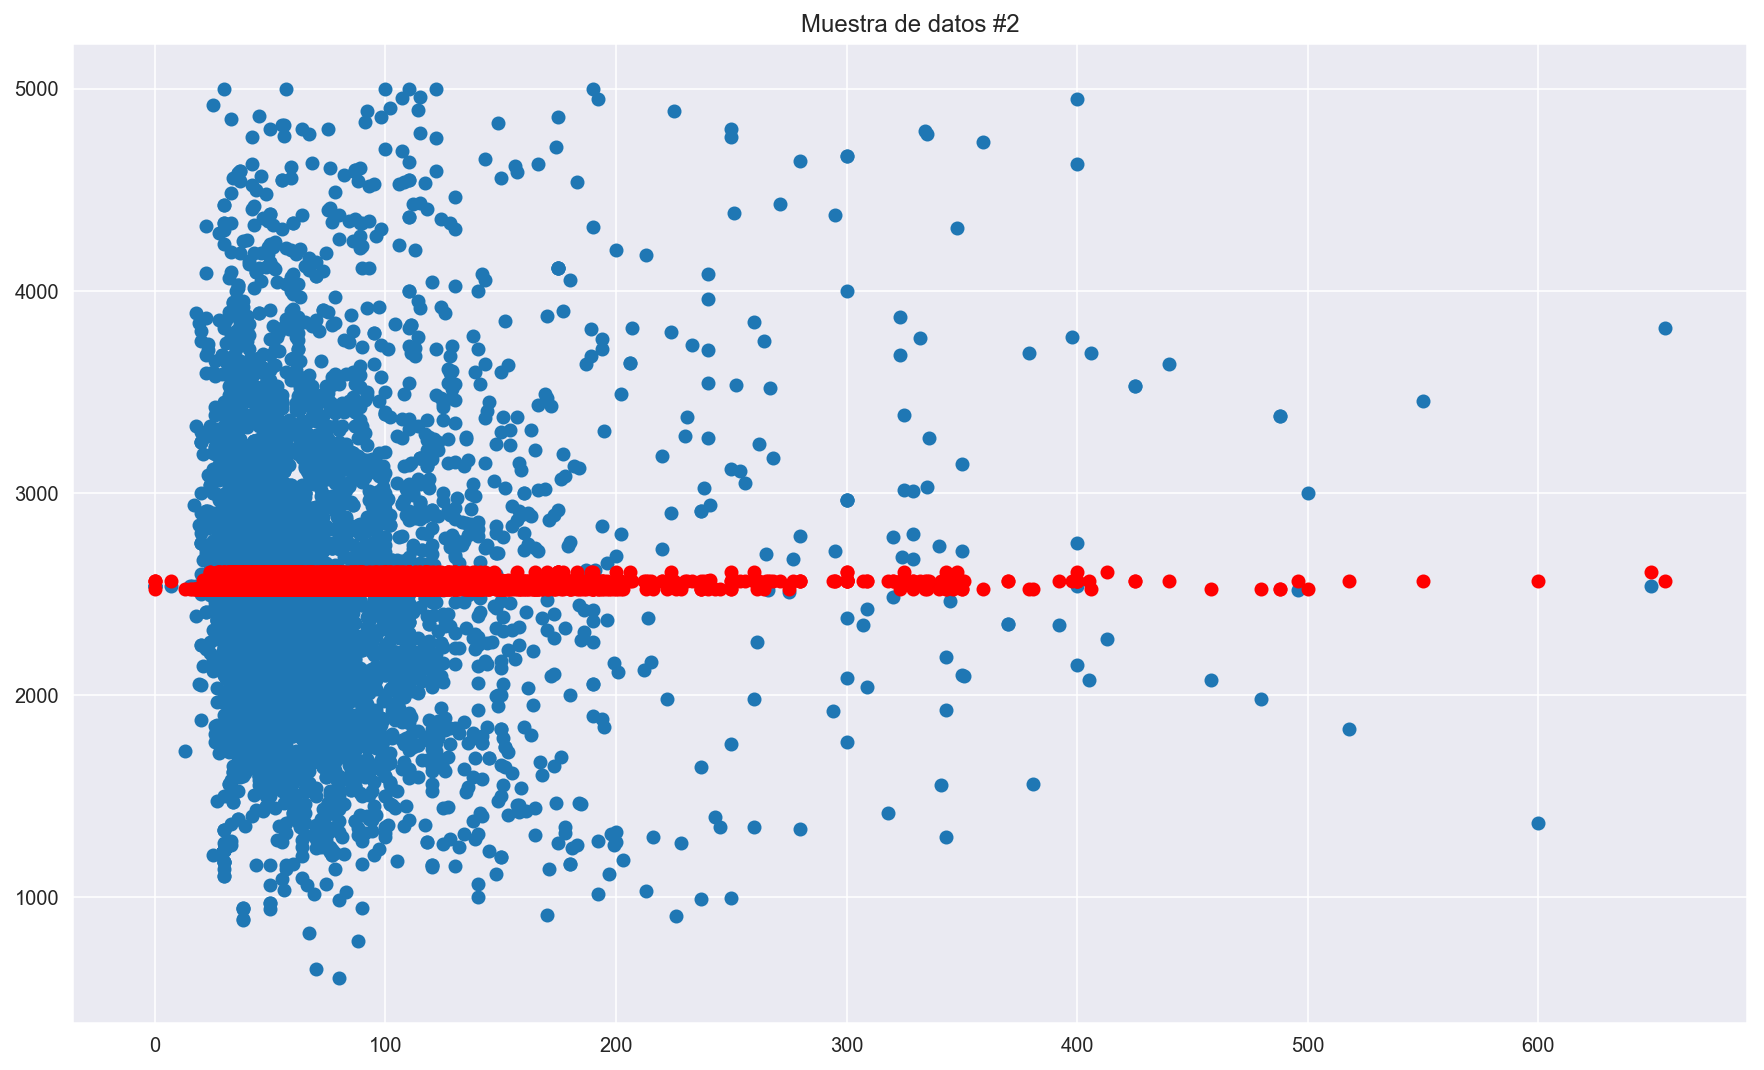

r^2 tests: 0.01867405274011691


In [40]:
# X_train, X_test, y_train, y_test
# instanciamos un modelo 
lassocv = linear_model.LassoCV(alphas=np.linspace(1,10, 1000), cv=5, normalize=True)

# Ajustamos nuevamente nuestro modelo, esta vez con lassoCV
lassocv.fit(X_train, y_train)
predictions = lassocv.predict(X_train)

plt.scatter(X_train.surface_total_in_m2, y_train)
plt.title("Muestra de datos #1")
plt.scatter(X_train.surface_total_in_m2, predictions, c='r')
plt.show()
print ("r^2 entrenamiento:", lassocv.score(X_train, y_train))
print ("alpha:", lassocv.alpha_)

# ahora con datos de TEST
predictions = lassocv.predict(X_test)

plt.scatter(X_test.surface_total_in_m2, y_test)
plt.title("Muestra de datos #2")
plt.scatter(X_test.surface_total_in_m2, predictions, c='r')
plt.show()
print ("r^2 tests:", lassocv.score(X_test, y_test))

## REGULARIZACIÓN, OVERFITTING y CROSS-VALIDATIO

Cross-validation y luego comparar el ajuste con _cross-validation_ contra el caso sin _cross-validation_. 
Usamos la función "sklearn.model_selection.cross_val_score" para ver las métricas del modelo con _cross-validation_ .

In [41]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
#from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#X_train, X_test, y_train, y_test

#INSTANCIO EL MODELO
lr = linear_model.LinearRegression()

# KFold: Provides train/test indices to split data in train/test sets. 
# Split dataset into k consecutive folds (without shuffling by default).
# OBJETO PARA CROSS-VALIDATION (K-Folds cross-validator) 
cv = KFold(5, shuffle=True)
# LO BUENO DE USAR ESTE OBJETO, ES QUE PODRÍA USARLO PARA HACER SIEMPRE LAS MISMAS PARTICIONES

# cross_val_score: Evaluate a score by cross-validation
# ACÁ USA EL MODELO, LOS DATOS DE TRAIN X e Y, Y EL OBJETO CV y especifica como resultado R2
scores = cross_val_score(lr, X_train, y_train, cv=cv, scoring='r2')
scores, scores.mean()

(array([0.12471783, 0.13107897, 0.11762204, 0.10581994, 0.1296326 ]),
 0.12177427698132792)

## Regularización: Lasso y Ridge

Lasso (en inglés: _least absolute shrinkage and selection operator_) es otra forma de regularization. 

La principal diferencia entre Lasso y Ridge es cómo se penaliza y que puede levar coeficientes a CERO, bajando la dimensionalidad
En Lasso y Ridge es necesario que lo features esten en la misma escala

In [42]:
# INSTANCIO Y FITEO EL MODELO LASSO  -- ACÁ PRUEBO SIN NORMALIZAR

model = linear_model.LassoCV(alphas=np.linspace(0.001, 0.01, 1000)).fit(X_train, y_train)

# HAGO CROSS VALIDATIONS
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')

# MUESTRA TODOS LOS PARÁMETROS OBTENIDOS
dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum())

# se muestra que eliminó ("descartó") 13 coeficientes

{'alpha': 0.001,
 'scores': array([0.13186487, 0.11216416, 0.13281658, 0.1110126 , 0.12454626]),
 'mean_score': 0.1224808931892287,
 'zero_coefs': 1}

In [43]:
# INSTANCIO Y FITEO EL MODELO LASSO  -- ACÁ PRUEBO NORMALIZANDO
model = linear_model.LassoCV(alphas=np.linspace(0.00001, 0.001, 1000), normalize=True).fit(X_train, y_train)

# HAGO CROSS VALIDATIONS
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')

# MUESTRA TODOS LOS PARÁMETROS OBTENIDOS
dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum())

# se muestra que eliminó ("descartó") 1 coeficientes

{'alpha': 5.063063063063062e-05,
 'scores': array([0.12466804, 0.12859465, 0.12669859, 0.12633201, 0.10516358]),
 'mean_score': 0.12229137188256486,
 'zero_coefs': 1}

In [44]:
# INSTANCIO Y FITEO EL MODELO RIDGE  -- ACÁ PRUEBO NORMALIZANDO
model = linear_model.RidgeCV(alphas=np.linspace(0.001, 0.1, 1000), normalize=True).fit(X_train, y_train)

# HAGO CROSS VALIDATIONS
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')

# MUESTRA TODOS LOS PARÁMETROS OBTENIDOS
dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean())

{'alpha': 0.012297297297297297,
 'scores': array([0.1177317 , 0.12045762, 0.11360649, 0.13668545, 0.10980712]),
 'mean_score': 0.11965767480472292}

In [130]:
model.score(X_test, y_test)  # acá vemos con los datos de TEST

0.10756613101108792

<hr id="ToCSV">
<h2 style="color: lightblue">GRAFICOS</h2>

<hr id="ToCSV">
<h2 style="color: lightblue">GENERAR CSV FINAL</h2>

In [ ]:
#data_clean.to_csv("CleanCSV/Clean09_MODELO.csv")